<a href="https://colab.research.google.com/github/luciabarg/datos_tumoresferas/blob/main/G1/1_AyVD_Clasif_Tumoresferas_G1_revisi%C3%B3n_Lu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<center>
<h4>Universidad Nacional de Córdoba - Facultad de Matemática, Astronomía, Física y Computación</h4>
<h3>Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones</h3>
 <h2>Mentoría: Clasificación de Tumoresferas </h2>
</center>



<a name="exploratory_data_analysis"></a>
#### **Práctico de Análisis Exploratorio y Visualización**



### Descripción de los datos:

Se tratan de datos procesados en el [Grupo de Materia Condensada](https://ri.conicet.gov.ar/handle/11336/102) (FaMAF-UNC, IFEG-CONICET) en colaboración con el Laboratorio de Células Madre del [IBYME-CONICET](https://www.ibyme.org.ar/laboratorios/49/celulas-madre) a partir de imágenes tomadas usando un microscopio óptico invertido común.


Para extraer la información estructurada a partir de las imágenes se hizo uso del programa Fiji, que es un paquete de procesamiento de imágenes, distribución muy completa del programa [ImageJ](https://www.medicinatv.com/profesional/reportajes/una-plataforma-abierta-revoluciona-el-procesamiento-de-imagenes-biomedicas-4596/), que es ampliamente utilizado para procesar
imágenes médicas.

De acuerdo a la documentación del programa,
es posible contar y medir objetos si conocemos la escala en la cual se han
llevado a cabo dichas imágenes, en este caso, a cuántos $\mu$m equivale un
píxel.
Para llevar a cabo el procedimiento detallado en la [documentación](https://imagej.nih.gov/ij/docs/guide/146-30.html#sub:Analyze-Particles...),
es necesario contar con una imagen umbralizada.

Se realizó este procedimiento en las 91 imágenes disponibles y se etiquetaron en *esferoides* 'si' y 'no' de acuerdo al criterio de un [experto](https://www.conicet.gov.ar/new_scp/detalle.php?id=43977&datos_academicos=yes), obteniendo 1018 datos.



Importamos las librerías necesarias


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import io
import matplotlib
import matplotlib.pyplot as plt
sns.set_context('talk')

import warnings
warnings.filterwarnings("ignore")

from scipy.stats import kurtosis
import scipy.stats
import math

# Ejemplo de una de las imágenes umbralizadas:
from IPython.display import Image


# por si quieren ver los distintos formatos:
# https://datavizpyr.com/seaborn-set_context-to-adjust-size-of-plot-labels-and-lines/
# https://seaborn.pydata.org/generated/seaborn.set_context.html


url = 'https://raw.githubusercontent.com/luciabarg/datos_tumoresferas/main/data/raw/fiji_datos_0al7mo_labels.csv'
fiji_datos = pd.read_csv(url)
fiji_datos

,labels,Area,X,Y,XM,YM,Perim.,BX,BY,Width,...,FeretY,FeretAngle,MinFeret,AR,Round,Solidity,Esferoide,dia,Diameter,n_diam
0,Esferas_BT474_dia_0_well_1_100X_1_blob_1,324.4440,1129.2718,102.2051,1129.2718,102.2051,67.3603,1118.8859,92.3913,21.0598,...,157,23.4287,19.7011,1.0653,0.9387,0.9500,si,0,20.95640,1.491357
1,Esferas_BT474_dia_0_well_1_100X_1_blob_2,497.5115,1517.5528,126.1022,1517.5528,126.1022,82.8004,1504.7554,113.4511,25.8152,...,192,16.1443,25.1289,1.0475,0.9546,0.9569,si,0,26.00200,2.848733
2,Esferas_BT474_dia_0_well_1_100X_1_blob_3,282.9078,1314.2815,126.0988,1314.2815,126.0988,62.1586,1304.3478,116.8478,19.7011,...,189,15.4222,18.3424,1.0395,0.9620,0.9519,si,0,19.38970,1.181258
3,Esferas_BT474_dia_0_well_1_100X_1_blob_5,500.7421,1189.2841,212.6155,1189.2841,212.6155,84.5571,1175.9511,200.4076,26.4946,...,309,174.1440,25.1359,1.0278,0.9730,0.9493,si,0,25.88475,2.810370
4,Esferas_BT474_dia_0_well_1_100X_1_blob_6,492.8964,1043.0782,247.7667,1043.0782,247.7667,82.0728,1030.5707,235.7337,25.1359,...,353,143.4270,24.4565,1.0186,0.9817,0.9643,si,0,25.33985,2.636596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1013,Esferas_BT474_dia_7_well_2_100X_5_blob_2,539.0477,534.6299,153.9304,534.6299,153.9304,87.0414,521.7391,139.2663,25.1359,...,205,105.9454,25.1359,1.1762,0.8502,0.9570,no,7,27.40515,3.335248
1014,Esferas_BT474_dia_7_well_2_100X_5_blob_4,277.8311,195.4265,433.4826,195.4265,433.4826,62.5566,185.4620,424.5924,18.3424,...,627,128.6598,18.1132,1.2288,0.8138,0.9473,no,7,19.93145,1.283064
1015,Esferas_BT474_dia_7_well_2_100X_5_blob_5,435.6687,122.7770,446.2430,122.7770,446.2430,77.6671,112.0924,433.4239,20.3804,...,638,107.5256,20.3804,1.2472,0.8018,0.9657,no,7,23.72610,2.164266
1016,Esferas_BT474_dia_7_well_2_100X_6_blob_3,531.2020,58.4620,261.9482,58.4620,261.9482,89.5939,44.8370,248.6413,26.4946,...,399,34.3803,24.9780,1.2569,0.7956,0.9350,no,7,28.12875,3.606474


## Datos


Cargamos los datos de los experimentos realizados desde el día cero al séptimo.


Ya se encuentran las etiquetas y el valor de las poblaciones celulares estimadas en cada esferoide.

#### Descripción de las columnas:

   * **labels** (*'nombre_id'*): etiqueta que indica la estructura segmentada seleccionada.
   * **Area** (*'area'*): columna que indica el área de selección en $\mu$m$^2$.
   * **Perim.** (*'perimetro'*): Es la longitud  del límite exterior de la selección.
   * **Width** (*'ancho'*) y **Height** (*'altura'*): Es el ancho y la altura del rectángulo mas pequeño que encierra la estructura seleccionada.
   * **Circ.** (*'circulalidad'*): Indica la *circularidad*. Se calcula como 4π × [Area]/[Perimeter]$^2$, que con un valor de 1.0 indica un círculo perfecto. A medida que se acerca a 0.0, indica una forma cada vez más alargada.
   * Columnas del diámetro de Feret:
       * **Feret** (*feret*): Indica la distancia más larga entre dos puntos a lo largo del límite de selección.
       * **MinFeret** (*min_feret*): Indica la distancia mínima entre dos puntos a lo largo del límite de selección.
       * **FeretAngle**: Indica el ángulo del diámetro de Feret.
       * **FeretX** y **FeretY**: son las coordenadas iniciales del diámetro de Feret.
       * **AR** (*razon_aspecto*): Indica la  razón de aspecto de la elipse ajustada de la estructura seleccionada, es decir, [Eje mayor]/[Eje menor].
       * **Round** (*redondez*): Se calcula como  (4 × [Area] )/ (π × [Major axis]^2) o como la inversa de **AR**. Tiene un rango entre 0 y 1, con 1 indicando un círculo perfecto.
       * **Solidity**: Se calcula como [Area]/[Convex area]. Se calcula el área convexa como el área de una banda elástica envuelta firmemente alrededor de los puntos que definen la selección.
       * **Esferoide** (*esferoide*): etiqueta que indica si la estructura seleccionada califica como esferoide o no
       * **dia**: etiqueta que indica el día en el cual fue realizada la fotografía de origen.
       * **Diameter** (*diametro*): Se calculó como 0.5*(*Feret*+*MinFeret*)
       * **n_diam** (*poblacion_celular*)


**Modelo para la estimación de la población celular *n_diam*:**

*Se puede hacer una estimación de la cantidad de células en una tumoresfera a partir del volumen $V_1$ de una célula de diámetro $D_1$;*

*Si tenemos una célula, entonces $V_1 = \frac{\pi}{6} D_1^3$ pero si el esferoide tiene $n$ células, entonces tendremos un volumen $V_n = n V_1$ para un diámetro $D_n$ de manera que $V_n =  \frac{\pi}{6} D_n^3$.*

*Si conocemos el diámetro $D_1$ de la célula a un tiempo inicial y el diámetro $D_n$ a un tiempo posterior, reemplazando $V_n$ y $V_1$ podemos estimar la población celular $n$ como: $n  = \frac{V_n}{V_1}= \frac{D_n^3}{D_0^3}.$*






Como utilizamos las imágenes ya segmentadas y recortadas, las columnas *X*, *Y*, *XM*, *YM*, *BX*, *BY*, las coordenadas del diámetro de Feret (*FeretX* y *FeretY*) y el ángulo (*FeretAngle*) **¿suman información al análisis?**


Para mas información, pueden explorar la [documentación](https://imagej.nih.gov/ij/docs/guide/146-30.html#sub:Analyze-Particles...).


Pueden ver las imágenes crudas y las individuales (cada fila es una estructura) en la siguiente [carpeta compartida](https://drive.google.com/drive/folders/1aws02t4Z0wSrdbHsQ-cgBkwX8PKLU71c?usp=sharing).

# Análisis de los datos:

*   1) a) Explorar cuántos datos son, ¿cuáles son las columnas? Diferenciar entre categóricas y numéricas. **COMPLETO**

       b) De acuerdo a la descripción de las columnas, definir cuáles son las más importantes y descartar las columnas que no tienen mucha validez para el problema. **COMPLETO**

*   2) Cambiar el nombre de las columnas en inglés a castellano (están indicadas en paréntesis en la descripción). **COMPLETO**
*   3) Tratemos de responder alguna de las siguientes preguntas:
    * a) ¿Se trata de una muestra o población? **COMPLETO**
    * b) ¿Es más probable que sea esferoide a que no lo sea? **COMPLETO**

    * c) ¿La forma (área, circularidad, diámetro, redondez) influye en la clasificación de *Esferoide*?.

    * d) ¿Tales variables son independientes entre sí?. Plotear regresión logística de variables-Ubeiden
    * e) ¿La probabilidad de que la redondez ('Round') sea mayor a 0.9 en los clasificados como *Esferoides* = **si** es mayor que los clasificados como *Esferoides* = **no**?. **COMPLETO**

* 4) También se puede explorar la muestra por día:
    * a) ¿Cuántos datos hay por día? Hacer gráfico de frecuencias. Plotear de nuevo pero solo `día`. **COMPLETO**

    * b) Explorar con diagramas de cajas al menos una columna (ej. Diameter, n_diam, pero pueden animarse a más).

    * c) Discriminar la(s) columna(s) elegida(s) en *Esferoide* **si** y **no** y ver sus distribuciones. ¿Son distintas?. Describirlas (asimetría, kurtosis, etc..) **COMPLETO**

    * d) ¿Hay outliers? Hacer con el total y luego discriminando por *Esferoide'* **si** y **no**. ¿Qué pueden implicar biológicamente? Si los eliminan, ¿cuál sería la justificación?  **COMPLETO**

     Si identifican un par, traten de determinar el *'nombre_id'* y las buscamos en las imágenes en la [carpeta compartida](https://drive.google.com/drive/folders/1aws02t4Z0wSrdbHsQ-cgBkwX8PKLU71c?usp=sharing).

    * e) La media de los esferoides=*no* al día 3 es igual que al día 5? Realizar Test de Hipótesis. **COMPLETO**

    * f) Determinen el intervalo de confianza diario de tal(es) columna(s) para las clasificadas como *'Esferoide'*=**'si'**. Y exploren como utilizarlos como barras de error en el gráfico. **COMPLETO**

    El intervalo de confianza está dado por $$[LI;LS]$$ donde

    $$ LI = \overline{x}-t_{n-1,1-\alpha/2}\frac{s}{\sqrt n}$$
    $$ LS = \overline{x}+t_{n-1,1-\alpha/2}\frac{s}{\sqrt n}$$

   siendo $s$ la desviación de la distribución y $n$ el tamaño de la muestra.
   Pueden calcular el t-valor en la siguiente [página](https://goodcalculators.com/student-t-value-calculator/) y explorar la librería [scipy.stats.t](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html) .



Interpretar lo que ven en los gráficos en términos generales. ¿Qué creen que sucedió a partir del día 6?


* 5) ¿Qué otras preguntas se pueden o quisieran plantear? (las que puedan y quieran, las responden, sino planteenlas nomás y las charlamos, quizás se las puede responder con otras herramientas o simplemente son interesantes para tenerlas en cuenta y sería lindo tener otra clase de datos para responderlas.)


Recordar que es importante como se comunican las respuestas, usar lo que van prendiendo a partir de cada punto y también guitarra ;).

Diseñar e implementar una comunicación a partir de algún ejercicio/s del entregable que les haya llamado la atención y que les parezca relevante en un archivo PDF o ppt.

# DESARROLLO

## 1.a) Exploración de Datos

In [ ]:
##Tenemos 1018 rows y 23 columnas
fiji_datos

,labels,Area,X,Y,XM,YM,Perim.,BX,BY,Width,...,FeretY,FeretAngle,MinFeret,AR,Round,Solidity,Esferoide,dia,Diameter,n_diam
0,Esferas_BT474_dia_0_well_1_100X_1_blob_1,324.4440,1129.2718,102.2051,1129.2718,102.2051,67.3603,1118.8859,92.3913,21.0598,...,157,23.4287,19.7011,1.0653,0.9387,0.9500,si,0,20.95640,1.491357
1,Esferas_BT474_dia_0_well_1_100X_1_blob_2,497.5115,1517.5528,126.1022,1517.5528,126.1022,82.8004,1504.7554,113.4511,25.8152,...,192,16.1443,25.1289,1.0475,0.9546,0.9569,si,0,26.00200,2.848733
2,Esferas_BT474_dia_0_well_1_100X_1_blob_3,282.9078,1314.2815,126.0988,1314.2815,126.0988,62.1586,1304.3478,116.8478,19.7011,...,189,15.4222,18.3424,1.0395,0.9620,0.9519,si,0,19.38970,1.181258
3,Esferas_BT474_dia_0_well_1_100X_1_blob_5,500.7421,1189.2841,212.6155,1189.2841,212.6155,84.5571,1175.9511,200.4076,26.4946,...,309,174.1440,25.1359,1.0278,0.9730,0.9493,si,0,25.88475,2.810370
4,Esferas_BT474_dia_0_well_1_100X_1_blob_6,492.8964,1043.0782,247.7667,1043.0782,247.7667,82.0728,1030.5707,235.7337,25.1359,...,353,143.4270,24.4565,1.0186,0.9817,0.9643,si,0,25.33985,2.636596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1013,Esferas_BT474_dia_7_well_2_100X_5_blob_2,539.0477,534.6299,153.9304,534.6299,153.9304,87.0414,521.7391,139.2663,25.1359,...,205,105.9454,25.1359,1.1762,0.8502,0.9570,no,7,27.40515,3.335248
1014,Esferas_BT474_dia_7_well_2_100X_5_blob_4,277.8311,195.4265,433.4826,195.4265,433.4826,62.5566,185.4620,424.5924,18.3424,...,627,128.6598,18.1132,1.2288,0.8138,0.9473,no,7,19.93145,1.283064
1015,Esferas_BT474_dia_7_well_2_100X_5_blob_5,435.6687,122.7770,446.2430,122.7770,446.2430,77.6671,112.0924,433.4239,20.3804,...,638,107.5256,20.3804,1.2472,0.8018,0.9657,no,7,23.72610,2.164266
1016,Esferas_BT474_dia_7_well_2_100X_6_blob_3,531.2020,58.4620,261.9482,58.4620,261.9482,89.5939,44.8370,248.6413,26.4946,...,399,34.3803,24.9780,1.2569,0.7956,0.9350,no,7,28.12875,3.606474


In [ ]:
###Revisamos los nombres de las columnas
fiji_datos.columns

Index(['labels', 'Area', 'X', 'Y', 'XM', 'YM', 'Perim.', 'BX', 'BY', 'Width',
       'Height', 'Circ.', 'Feret', 'FeretX', 'FeretY', 'FeretAngle',
       'MinFeret', 'AR', 'Round', 'Solidity', 'Esferoide', 'dia', 'Diameter',
       'n_diam'],
      dtype='object')

**[Lu]**

Solo una observación, tratar de que aparezca toda la base de datos puede ser muy costoso en tiempo a veces, quizás conviene un *df.head()* como para ver algunos valores pero no cargar todo el dataset.

Quizás se podría haber jugado un poquito más, por ejemplo, que la info de la cantidad de filas y columnas salga de un comando (*df.shape*), identificar cuales eran categóricas, cuáles numéricas por eje, algún *df.info()* o *df.describe()*, que les da un pantallazo general y rápido del dataset. .

**[Lu]**

## 1.b) Eliminar columnas

- Consideramos que el las coordenads `FeretX`, `FeretY` de Feret no son relevantes, con el solo Feret$_{promedio}$ (`Feret`) es suficiente.

- También vemos variables como "`X`", "`Y`", "`XM`", "`YM`", "`BX`", "`BY`", que se relacionan con el Feret y al ser simplemente coordenadas en el plano consideramos que son variables que aportan información para la toma de decisiones en la clasificación de celulas tumorales.



In [ ]:
fiji_datos.drop(['X', 'Y', 'XM',"YM", "BX", "BY", "FeretX", "FeretY" ], axis=1, inplace=True)

**[Lu]**

Para una primera aproximación, sin haber analizado los datos, está bien. También se pueden descartar *'Width'*, *'Height'* y *'FeretAngle'* porque como se ve en la descripción de las columnas:

 * **Width** ('ancho') y **Height** ('altura'): Es el ancho y la altura del rectángulo mas pequeño que encierra la estructura seleccionada
 * **FeretAngle**: Indica el ángulo del diámetro de Feret.

y eso sería útil quizás si queremos hacer detección de la posición de las esferas, pero como acá se mueven mucho porque están en suspención, no nos suma la información espacial.


**[Lu]**

## 2) Cambiar nombres de columnas

In [ ]:
new_column_names = {'labels':'nombre_id', 'Area': 'area', 'Perim.':'perimetro', 'Width':'ancho', 'Height':'altura', 'Circ.':'circularidad',
 'Feret':'feret', 'MinFeret':'min_feret', 'AR':'razon_aspecto', 'Round':'redondez',
 'Esferoide':'esferoide', 'Diameter':'diametro', 'n_diam':'poblacion_celular'}

# Renombrar las columnas
fiji_datos_clean_names = fiji_datos.rename(columns=new_column_names)

**[Lu]**

Acá podrían chusmear con un df.head() que efectivamente se cambiaron los nombres de las columas.  
También se suele hacer df_new = df.copy() para que se trate de un nuevo dataset y los cambios realizados en uno no afecta al otro.


**[Lu]**


In [ ]:
fiji_datos_clean_names.head()

,nombre_id,area,perimetro,ancho,altura,circularidad,feret,FeretAngle,min_feret,razon_aspecto,redondez,Solidity,esferoide,dia,diametro,poblacion_celular
0,Esferas_BT474_dia_0_well_1_100X_1_blob_1,324.4440,67.3603,21.0598,19.7011,0.8985,22.2117,23.4287,19.7011,1.0653,0.9387,0.9500,si,0,20.95640,1.491357
1,Esferas_BT474_dia_0_well_1_100X_1_blob_2,497.5115,82.8004,25.8152,25.1359,0.9119,26.8751,16.1443,25.1289,1.0475,0.9546,0.9569,si,0,26.00200,2.848733
2,Esferas_BT474_dia_0_well_1_100X_1_blob_3,282.9078,62.1586,19.7011,18.3424,0.9201,20.4370,15.4222,18.3424,1.0395,0.9620,0.9519,si,0,19.38970,1.181258
3,Esferas_BT474_dia_0_well_1_100X_1_blob_5,500.7421,84.5571,26.4946,25.1359,0.8801,26.6336,174.1440,25.1359,1.0278,0.9730,0.9493,si,0,25.88475,2.810370
4,Esferas_BT474_dia_0_well_1_100X_1_blob_6,492.8964,82.0728,25.1359,24.4565,0.9195,26.2232,143.4270,24.4565,1.0186,0.9817,0.9643,si,0,25.33985,2.636596


## 1.b) Exploración de Datos - Tipo, correlación y outliers

#### Tipo de datos

In [ ]:
##se visualiza que la unica columna categórica es la columna "esferoide"
# (+"nombre_id" pero no se no se considera para los análsis al ser solamente el nombre que se le da a de cada foto)
fiji_datos_clean_names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1018 entries, 0 to 1017
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   nombre_id          1018 non-null   object 
 1   area               1018 non-null   float64
 2   perimetro          1018 non-null   float64
 3   ancho              1018 non-null   float64
 4   altura             1018 non-null   float64
 5   circularidad       1018 non-null   float64
 6   feret              1018 non-null   float64
 7   FeretAngle         1018 non-null   float64
 8   min_feret          1018 non-null   float64
 9   razon_aspecto      1018 non-null   float64
 10  redondez           1018 non-null   float64
 11  Solidity           1018 non-null   float64
 12  esferoide          1018 non-null   object 
 13  dia                1018 non-null   int64  
 14  diametro           1018 non-null   float64
 15  poblacion_celular  1018 non-null   float64
dtypes: float64(13), int64(1)

 * **labels** (*'nombre_id'*): etiqueta que indica la estructura segmentada seleccionada.
   * **Area** (*'area'*): columna que indica el área de selección en $\mu$m$^2$.
   * **Perim.** (*'perimetro'*): Es la longitud  del límite exterior de la selección.
   * **Width** (*'ancho'*) y **Height** (*'altura'*): Es el ancho y la altura del rectángulo mas pequeño que encierra la estructura seleccionada.
   * **Circ.** (*'circulalidad'*): Indica la *circularidad*. Se calcula como 4π × [Area]/[Perimeter]$^2$, que con un valor de 1.0 indica un círculo perfecto. A medida que se acerca a 0.0, indica una forma cada vez más alargada.
   * Columnas del diámetro de Feret:
       * **Feret** (*feret*): Indica la distancia más larga entre dos puntos a lo largo del límite de selección.
       * **MinFeret** (*min_feret*): Indica la distancia mínima entre dos puntos a lo largo del límite de selección.
       * **FeretAngle**: Indica el ángulo del diámetro de Feret.
       * **FeretX** y **FeretY**: son las coordenadas iniciales del diámetro de Feret.
       * **AR** (*razon_aspecto*): Indica la  razón de aspecto de la elipse ajustada de la estructura seleccionada, es decir, [Eje mayor]/[Eje menor].
       * **Round** (*redondez*): Se calcula como  (4 × [Area] )/ (π × [Major axis]^2) o como la inversa de **AR**. Tiene un rango entre 0 y 1, con 1 indicando un círculo perfecto.
       * **Solidity**: Se calcula como [Area]/[Convex area]. Se calcula el área convexa como el área de una banda elástica envuelta firmemente alrededor de los puntos que definen la selección.
       * **Esferoide** (*esferoide*): etiqueta que indica si la estructura seleccionada califica como esferoide o no
       * **dia**: etiqueta que indica el día en el cual fue realizada la fotografía de origen.
       * **Diameter** (*diametro*): Se calculó como 0.5*(*Feret*+*MinFeret*)
       * **n_diam** (*poblacion_celular*)


**Vemos que todas las variables estan en los formatos esperados, numéricas y categóricas (dia es ordinal). Siendo la única categorica la columna Esferoide**

In [ ]:
##No hay datos nulos
fiji_datos_clean_names.isnull().sum()

nombre_id            0
area                 0
perimetro            0
ancho                0
altura               0
circularidad         0
feret                0
FeretAngle           0
min_feret            0
razon_aspecto        0
redondez             0
Solidity             0
esferoide            0
dia                  0
diametro             0
poblacion_celular    0
dtype: int64

In [ ]:
###Estudiar la cardinalidad de cada variables :  Esto proporciona información sobre la distribución y la variabilidad de los valores en cada columna del conjunto de datos.
### y porcentaje de cada valor único en la variables observada

for col in fiji_datos_clean_names.columns:
  print(col)
  print('Cardinalidad:', fiji_datos_clean_names[col].nunique())
  print(100*fiji_datos_clean_names[col].value_counts(normalize=True).iloc[:10])
  print()

nombre_id
Cardinalidad: 1016
Esferas_BT474_dia_6_well_1_100X_11_blob_1    0.196464
Esferas_BT474_dia_6_well_1_100X_12_blob_1    0.196464
Esferas_BT474_dia_0_well_1_100X_1_blob_1     0.098232
Esferas_BT474_dia_4_well_2_100X_1_blob_31    0.098232
Esferas_BT474_dia_4_well_2_100X_1_blob_38    0.098232
Esferas_BT474_dia_4_well_2_100X_1_blob_35    0.098232
Esferas_BT474_dia_4_well_2_100X_1_blob_33    0.098232
Esferas_BT474_dia_4_well_2_100X_1_blob_32    0.098232
Esferas_BT474_dia_4_well_2_100X_1_blob_26    0.098232
Esferas_BT474_dia_4_well_2_100X_4_blob_4     0.098232
Name: nombre_id, dtype: float64

area
Cardinalidad: 911
562.1234     0.392927
1871.4371    0.294695
493.3579     0.294695
423.2079     0.294695
354.9039     0.294695
798.4183     0.294695
691.3472     0.294695
365.9802     0.294695
599.5060     0.196464
819.6479     0.196464
Name: area, dtype: float64

perimetro
Cardinalidad: 757
67.3603    0.589391
71.9992    0.589391
81.8397    0.589391
82.2377    0.491159
91.5154    0.491159

Vemos todas las variables estan muy dispersas en su cardinalidad, es decir, toman valores únicos diferentes, a excepción de la variable `día`, donde ~72% de los datos se colectaron entre los días 1-2-4. Luego el `ancho` y la `altura` con unos cuantos valores con al menos 2%. Con base en esto es muy difícil poder agrupar por valores únicos alguna variable.

In [ ]:
# Filtar por tipo variable y clasificarla como categórica o numérica
num_cols_df = fiji_datos_clean_names.select_dtypes(include=['float64', 'int'])
print("df_nuevo", num_cols_df.shape)
num_cols_df.describe()

df_nuevo (1018, 14)


,area,perimetro,ancho,altura,circularidad,feret,FeretAngle,min_feret,razon_aspecto,redondez,Solidity,dia,diametro,poblacion_celular
count,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000
mean,1948.874361,144.493180,42.462574,42.685466,0.830163,47.328600,95.952755,38.195012,1.237618,0.837940,0.947258,2.553045,42.761806,40.202463
std,3366.692373,104.611513,29.711988,30.275809,0.097560,32.787878,51.288792,26.796383,0.273783,0.138929,0.027233,1.945076,29.586773,113.927112
min,100.148400,36.082000,10.869600,10.190200,0.500300,12.247100,2.174700,9.722300,1.000800,0.369200,0.818500,0.000000,11.558350,0.250218
25%,460.590400,81.276900,24.456500,23.777200,0.788775,26.633600,49.192225,22.830425,1.059225,0.767250,0.941400,1.000000,25.116862,2.567602
50%,781.803800,109.837800,31.929300,31.929300,0.867000,36.527200,106.839900,28.494600,1.128800,0.885850,0.955500,2.000000,32.789700,5.712732
75%,1570.761125,158.337000,46.875000,48.063850,0.902950,53.490825,143.579475,39.849075,1.303325,0.944100,0.963600,4.000000,46.430662,16.219830
max,22735.999500,635.872400,189.538000,203.804300,0.966700,213.226500,177.811400,165.233000,2.708700,0.999200,0.985100,7.000000,179.769300,941.408471


# 3) PREGUNTAS

### 3.a) Muestra o población ?

La muestra se elige de manera que represente las características y los seleccionados presentes en la población de interés. Por lo cual consideramos que se trata de una muestra debido a las siguientes características.

-Los datos fueron generados en un entorno de investigación y se recopilaron como parte de un proyecto específico.
-se obtuvo información extraida de las imágenes mediante un procedimiento que involucra contar y medir objetos. Esto implica que los datos se derivaron de un procesamiento de imágenes.

-Se obtuvieron 1018 datos a partir de 91 imágenes disponibles. Esto indica que los datos representan observaciones individuales de esferoides y se recopilaron a partir de una muestra de imágenes.

Estas caracteristicas nos indican que estamos hablando de un subconjunto de elementos, por eso los datos pertenecen a una muestra.




### 3.b)¿Es más probable que sea esferoide a que no lo sea ?

Es minimamente mas probable que que sea esferoide si ya que tiene una probabilidad del 51%, En cambio esferoide no es del 49%



In [ ]:
# Calcular el total de esferoides
total_esferoides = len(fiji_datos_clean_names['esferoide'])

# Calcular el número de esferoides etiquetados como "si"
num_si = fiji_datos_clean_names['esferoide'].value_counts().get('si', 0)

# Calcular el número de esferoides etiquetados como "no"
num_no = fiji_datos_clean_names['esferoide'].value_counts().get('no', 0)

# Calcular las probabilidades
probabilidad_si = num_si / total_esferoides
probabilidad_no = num_no / total_esferoides

# Imprimir los resultados
print('Probabilidad de ser esferoide "si":', probabilidad_si)
print('Probabilidad de ser esferoide "no":', probabilidad_no)

Probabilidad de ser esferoide "si": 0.5127701375245579
Probabilidad de ser esferoide "no": 0.48722986247544203


### 3.c) ¿La forma (área, circularidad, diámetro, redondez) influye en la clasificación de Esferoide?

Para evaluar la dependencia o no de estas variables entre sí aplicando una prueba de T-test, primero evaluamos la normalidad de los datos.

Utilizaremos el método Quantile-Quantile Normal, mientras más cercanos esten los puntos a la recta, más se pareceran los datos a un distribución normal, pero debemos ver la distribución de las variables si a simple vista tienen o no una distribución normal.

#### Prueba de normalidad

[link de refencia](https://towardsdatascience.com/methods-for-normality-test-with-application-in-python-bb91b49ed0f5)

#### Histograma de distribución de datos

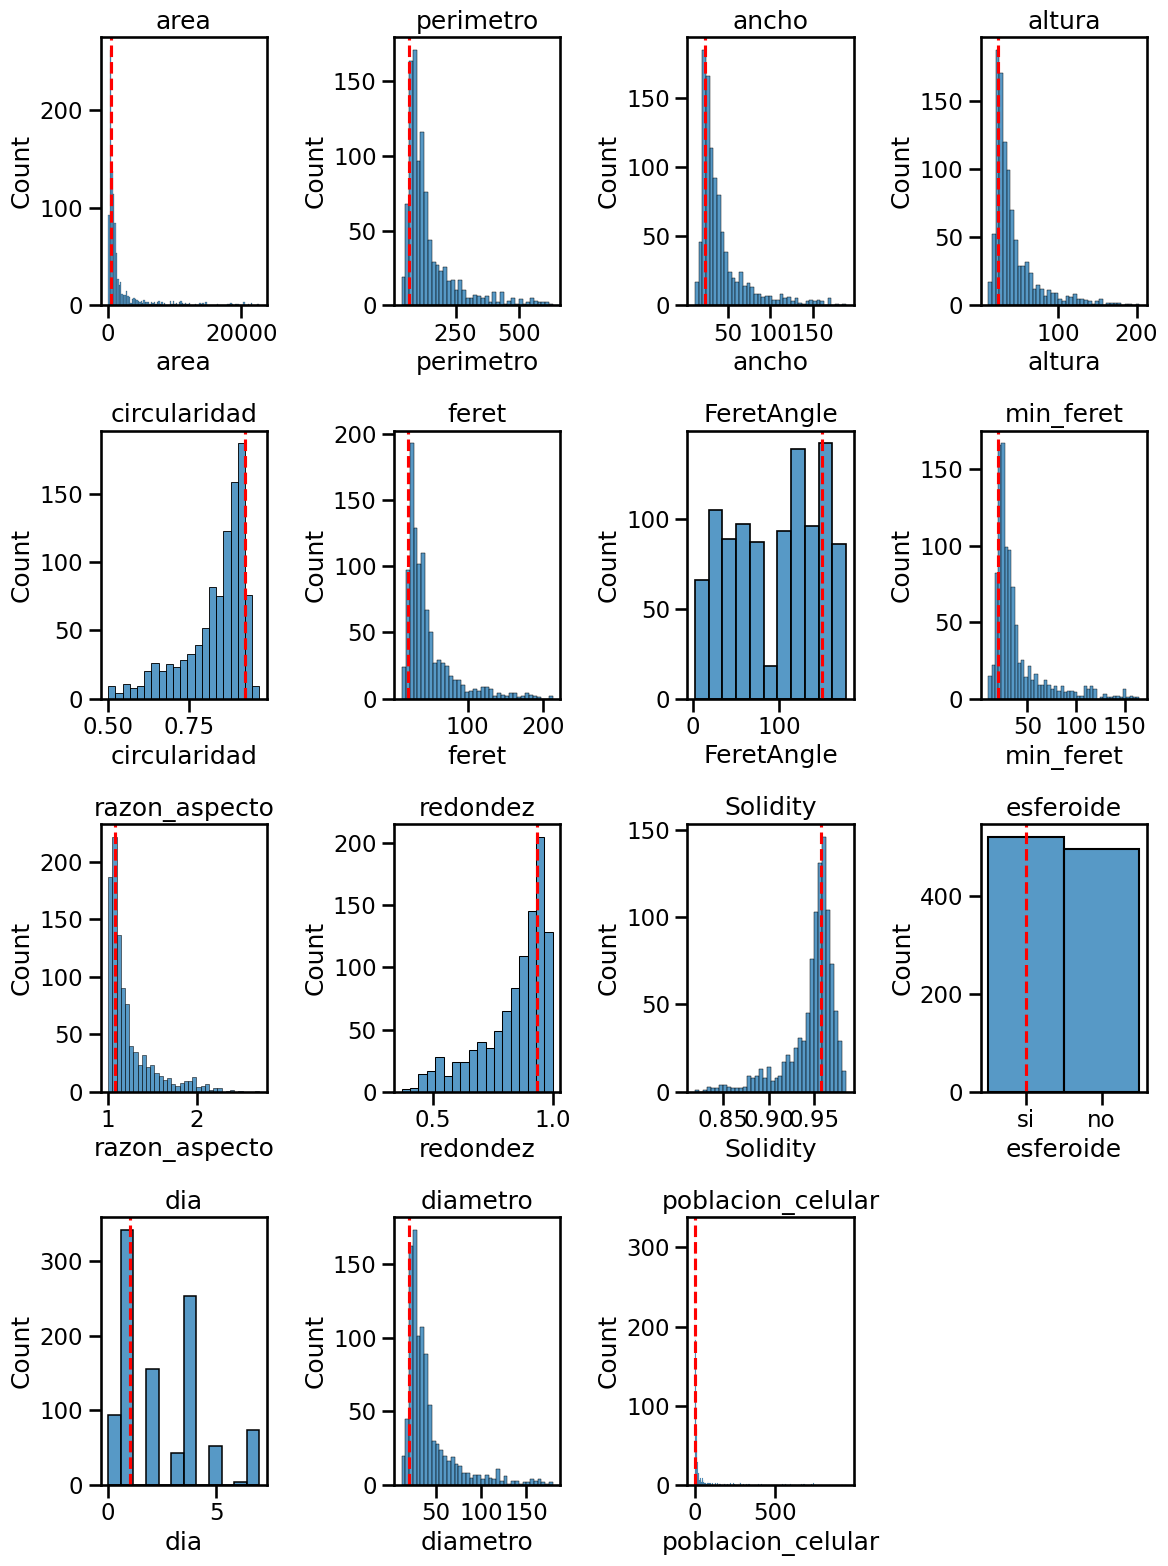

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

num_variables = len(fiji_datos_clean_names.columns)

# Calcular el numero de filas y columnas para el arreglo del subplot
num_rows = (num_variables - 3) // 4 + 1  # Restamos 2 para excluir la primera columna
num_cols = min(num_variables - 1, 4)  # Restamos 1 para excluir la primera columna

# Crear una figura y ejes para los subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 4*num_rows))

# Aplanar la matriz de ejes para que sea iterable
axes = axes.flatten()

# Iterar sobre las columnas numéricas (excluyendo la primera columna) y trazar distribuciones
for i, column in enumerate(fiji_datos_clean_names.columns[1:]):  # Iniciamos desde la segunda columna
    sns.histplot(fiji_datos_clean_names[column], ax=axes[i])
    axes[i].set_title(column)

    # Agregar una línea vertical que represente el modo de la variable
    mode = fiji_datos_clean_names[column].mode().values[0]
    axes[i].axvline(x=mode, color='r', linestyle='--')

        # Establecer los límites del eje y para cada subplot
    ymin, ymax = axes[i].get_ylim()
    axes[i].set_ylim(0, ymax)  # Ajusta la altura en y según tus necesidades

# Eliminar los subplots no utilizados
for j in range(num_variables - 1, len(axes)):
    fig.delaxes(axes[j])

# Ajustar el espacio entre los subplots
plt.tight_layout()

# Mostrar el plot
plt.show()

Del gráfico anterior se puede observar que:

- `area` y `poblacion_celular` tienen valores muy dispersos y ambas variables tienen valores cercanos a cero como lo indica la línea roja que corresponde a la **moda** (dato que más se repite), por lo tanto, en este primer "barrido" no se puede determinar si presentan distribución normal.


In [ ]:
fiji_datos_clean_names.columns

Index(['nombre_id', 'area', 'perimetro', 'ancho', 'altura', 'circularidad',
       'feret', 'FeretAngle', 'min_feret', 'razon_aspecto', 'redondez',
       'Solidity', 'esferoide', 'dia', 'diametro', 'poblacion_celular'],
      dtype='object')

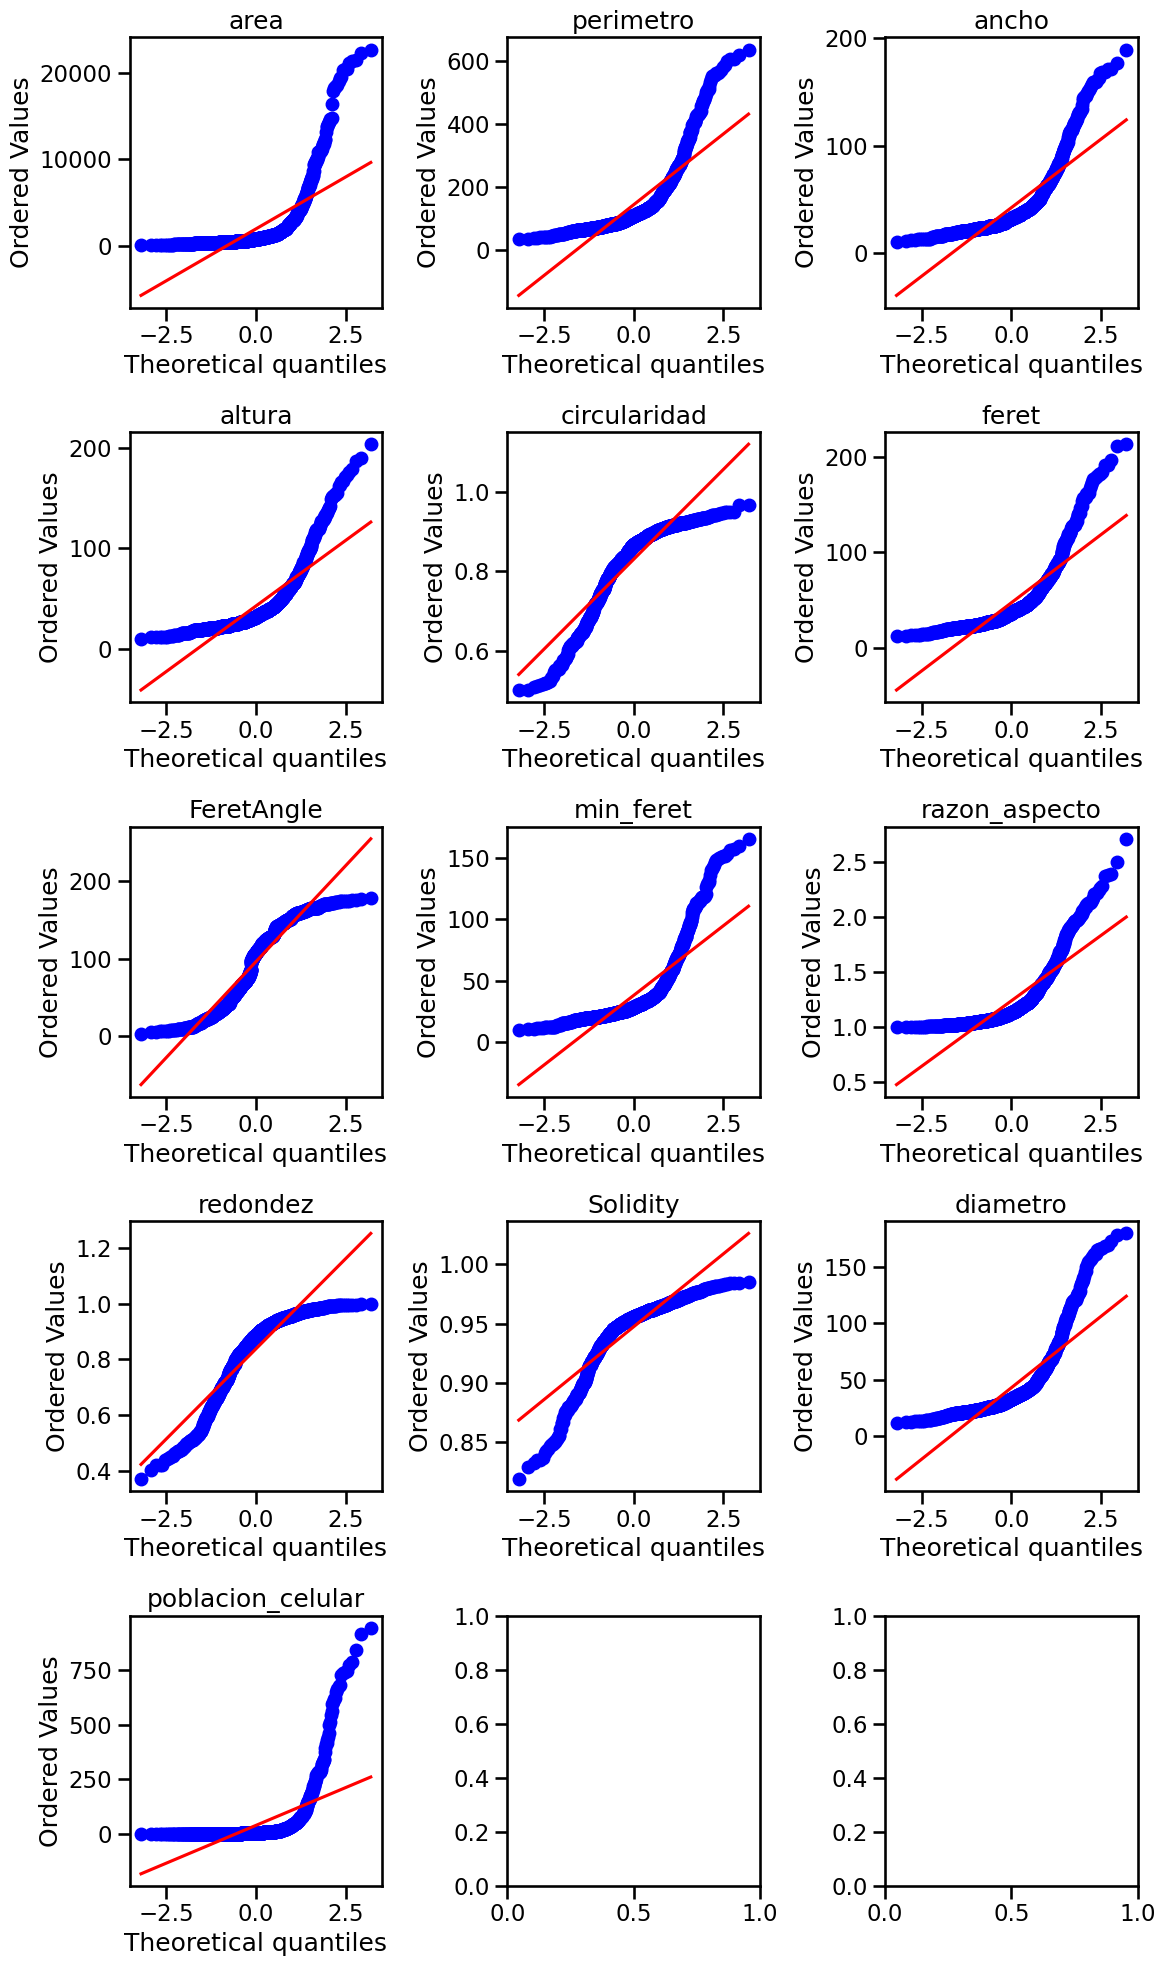

In [ ]:
###-------------------------------------------------------------------------------
## Aplicando el test método Quantile-Quantile Normal
###------------------------------------------------------------------------------

import scipy.stats as stats
import matplotlib.pyplot as plt

# Especificar las columnas para plotear
columns = ['area', 'perimetro', 'ancho', 'altura', 'circularidad', 'feret', 'FeretAngle', 'min_feret',
           'razon_aspecto', 'redondez', 'Solidity', 'diametro', 'poblacion_celular']

# Calcular el numero de filas y columnas para el arreglo del subplot
num_rows = (len(columns) - 1) // 3 + 1
num_cols = min(len(columns), 3)

# Crear el subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 4 * num_rows))

# Iterar sobre las columnas y plotear los gráficos de probabilidad
for i, column in enumerate(columns):
    row = i // num_cols
    col = i % num_cols
    ax = axs[row, col]
    stats.probplot(fiji_datos_clean_names[column], dist="norm", plot=ax)
    ax.set_title(column)

# ajustar el espacio entre los subplots
plt.tight_layout()

# Mostrar el plot
plt.show()


Los datos presentan discrepacias estadísticas entre las observaciones y la distribución normal, la única que tiene a acercarse es la `FeretAngle`. Por ello vamos a realizar un segundo test aplicando contraste de normalidad aplicando la prueba de **Shapiro-Wilks**.

In [ ]:
###-------------------------------------------------------------------------------
## Aplicando el test Shapiro-Wilks
###-------------------------------------------------------------------------------

from scipy.stats import shapiro

cols = ['area', 'perimetro', 'ancho', 'altura', 'circularidad', 'feret', 'FeretAngle', 'min_feret',
           'razon_aspecto', 'redondez', 'Solidity', 'diametro', 'poblacion_celular', 'dia']

for col in cols:
    estadistico, p_value = shapiro(fiji_datos_clean_names[col])
    print(f"Columna: {col}")
    print(f"Estadístico = {estadistico:.3f}, p-value = {p_value}")
    print()

Columna: area
Estadístico = 0.510, p-value = 0.0

Columna: perimetro
Estadístico = 0.731, p-value = 1.3707832284462941e-37

Columna: ancho
Estadístico = 0.734, p-value = 1.8864705921473842e-37

Columna: altura
Estadístico = 0.741, p-value = 4.257982374788829e-37

Columna: circularidad
Estadístico = 0.861, p-value = 4.365808137055681e-29

Columna: feret
Estadístico = 0.754, p-value = 2.156268571830881e-36

Columna: FeretAngle
Estadístico = 0.926, p-value = 6.105068004232905e-22

Columna: min_feret
Estadístico = 0.708, p-value = 9.529151856055551e-39

Columna: razon_aspecto
Estadístico = 0.750, p-value = 1.3528306669316063e-36

Columna: redondez
Estadístico = 0.866, p-value = 1.3996125314088212e-28

Columna: Solidity
Estadístico = 0.814, p-value = 1.026482074756331e-32

Columna: diametro
Estadístico = 0.732, p-value = 1.448709996566783e-37

Columna: poblacion_celular
Estadístico = 0.367, p-value = 0.0

Columna: dia
Estadístico = 0.876, p-value = 1.0576560142113385e-27



Por el perfil de la distribución en el histogramas *pareciera* que la mayoría de la variables presentan una distribución tipo **exponencial** a excepción de la variable `dia`.

Del test de Shapiro-Wilk concluímos que:

- Ho(aceptar): La muestra presenta distribución normal (Po>0.05)
- Ha(rechazar): La muestra NO presenta distirbución normal

Se observa que el `p_value` es <<< 0.05 lo cual nos dice que **los datos no presentan una distribución normal**.

### T-test para las medias de dos muestras independientes

La hipótesis nula es que el valor de la media de dos muestras indepentienes son la misma. Se asume que ambas poblaciones tienen variazas identicas.

In [ ]:
from scipy import stats

# Filtrar los datos para separar los "Esferoides" y los "No Esferoides"
esferoides = fiji_datos_clean_names[fiji_datos_clean_names['esferoide'] == 'si']
no_esferoides = fiji_datos_clean_names[fiji_datos_clean_names['esferoide'] == 'no']

# Obtener las características de forma para cada grupo
caracteristicas_esferoides = esferoides[['area', 'circularidad', 'diametro', 'redondez']]
caracteristicas_no_esferoides = no_esferoides[['area', 'circularidad', 'diametro', 'redondez']]

# Calcular las estadísticas descriptivas para cada grupo
estadisticas_esferoides = esferoides.describe()
estadisticas_no_esferoides = no_esferoides.describe()

print("Estadísticas descriptivas para Esferoides:")
print(estadisticas_esferoides)
print()
print("Estadísticas descriptivas para No Esferoides:")
print(estadisticas_no_esferoides)
print()


for columna in caracteristicas_esferoides.columns:
    p_value = stats.ttest_ind(caracteristicas_esferoides[columna], caracteristicas_no_esferoides[columna]).pvalue
    print(f"Prueba t para {columna}: p-valor = {p_value}")

Estadísticas descriptivas para Esferoides:
               area   perimetro       ancho      altura  circularidad  \
count    522.000000  522.000000  522.000000  522.000000    522.000000   
mean    2572.568024  163.332271   48.221981   48.357333      0.844440   
std     4080.043981  119.203532   34.328829   34.252482      0.085080   
min      155.530000   45.524600   14.945700   13.587000      0.500600   
25%      484.704500   82.402500   25.135900   25.135900      0.815425   
50%      913.104400  116.398150   34.307050   34.646700      0.872850   
75%     2639.972400  203.985250   60.462000   60.971475      0.903000   
max    22735.999500  620.239100  189.538000  187.500000      0.949800   

            feret  FeretAngle   min_feret  razon_aspecto    redondez  \
count  522.000000  522.000000  522.000000     522.000000  522.000000   
mean    52.721244   96.174211   44.304683       1.173235    0.872393   
std     36.978447   51.653722   31.433754       0.214188    0.113603   
min     15.

- Ho(aceptar): La muestra presenta distribución normal (Po>0.05)
- Ha(rechazar): La muestra NO presenta distirbución normal



Los p_valor dieron << 0.05, por lo tanto, se rechaza la hipótesis nula.

ACLARACIÓN: esto es asumiendo que los datos presentan una distribución normal.

Realizaremos un test de independencia entre la [variable categórica esferoide y una variable numérica](https://predictivehacks.com/how-to-choose-and-apply-the-right-statistical-test-in-python/), donde se tiene una significancia de $\alpha$ = 0.05

¿Hay realción entre las variables (`area`, `circularidad`, `diametro`, `redondez`) y `esferoide`?

- Ho: NO hay relación entre las variables (p_value > 0.05)
- H$_{1}$: SÍ hay relación entre las variables

En todos los casos rechazamos la Ho, lo cual significa que la **forma sí influye al momento de clasificación** como `si` y `no` de la variable `esferoide`.

In [ ]:
from scipy.stats import ttest_ind

t_stat, p = ttest_ind(fiji_datos_clean_names.query('esferoide=="si"')['area'], fiji_datos_clean_names.query('esferoide=="no"')['area'])
print("p_value area: ",p)
print()

t_stat, p = ttest_ind(fiji_datos_clean_names.query('esferoide=="si"')['circularidad'], fiji_datos_clean_names.query('esferoide=="no"')['circularidad'])
print("p_value circularidad: ",p)
print()

t_stat, p = ttest_ind(fiji_datos_clean_names.query('esferoide=="si"')['diametro'], fiji_datos_clean_names.query('esferoide=="no"')['diametro'])
print("p_value diametro: ",p)
print()

t_stat, p = ttest_ind(fiji_datos_clean_names.query('esferoide=="si"')['redondez'], fiji_datos_clean_names.query('esferoide=="no"')['redondez'])
print("p_value redondez: ",p)
print()

p_value area:  9.651134253745844e-10

p_value circularidad:  1.481728293278577e-06

p_value diametro:  1.3409470651217122e-10

p_value redondez:  1.6204193238887722e-16



### 3.d) ¿Tales variables son independientes entre sí?

El objetivo de realizar este análsis es para conocer si:
- *Muestras independientes*: cada observación corresponde a un sujeto o caso distinto.
- *Muestras relacionadas*: varias observaciones corresponden al mismo sujeto o caso.

No se espera tener muestras relacionadas (*tipo antes-después*) ya que "se no compararon" las células antes y después de ser clasificadas como células tumorales, o por lo menos, no contamos con esa información. Sin embargo, se harán los análisis pertinentes para demostrarlo.

In [ ]:
# ==============================================================================
# matrix de correlaciones entre variables
# ==============================================================================
"""
Se usa el método de spearman porque como se observó en la base de datos
tenemos variables que parecen tener una distribución normal y otra que no la
tienen.
"""

import scipy.stats as stats
import pandas as pd

mat_corr = fiji_datos_clean_names.corr(method="spearman")
p_values = pd.DataFrame(index=mat_corr.columns, columns=mat_corr.columns)

for col1 in mat_corr.columns:
    for col2 in mat_corr.columns:
        if col1 != col2:
            corr, p_value = stats.spearmanr(fiji_datos_clean_names[col1], fiji_datos_clean_names[col2])
            p_values.loc[col1, col2] = p_value

# Convert p-values to numeric type
p_values = p_values.astype(float)

# Convert p-values matrix to DataFrame
p_values_df = pd.DataFrame(p_values, columns=mat_corr.columns, index=mat_corr.columns)

# Print the p-value matrix
print('\nMatriz de p-valores:\n', p_values_df, '\n')


Matriz de p-valores:
                            area      perimetro          ancho         altura  \
area                        NaN   0.000000e+00   0.000000e+00   0.000000e+00   
perimetro          0.000000e+00            NaN   0.000000e+00   0.000000e+00   
ancho              0.000000e+00   0.000000e+00            NaN   0.000000e+00   
altura             0.000000e+00   0.000000e+00   0.000000e+00            NaN   
circularidad       1.817807e-98  8.281185e-134  2.019452e-106  1.570001e-114   
feret              0.000000e+00   0.000000e+00   0.000000e+00   0.000000e+00   
FeretAngle         2.838041e-03   1.490558e-03   1.408489e-02   6.284245e-04   
min_feret          0.000000e+00   0.000000e+00   0.000000e+00   0.000000e+00   
razon_aspecto      1.202419e-28   1.108898e-38   2.547691e-30   4.580389e-33   
redondez           1.232847e-28   1.143704e-38   2.609810e-30   4.707864e-33   
Solidity           2.944873e-10   3.905077e-04   8.122370e-07   6.724924e-06   
dia              

In [ ]:
mat_corr

##Resaltar aquellos p_values >0.8 donde se acepta la Ho
def highlighter(cell_value):
  if cell_value > 0.8:
        return "background-color: green"
mat_corr.style.applymap(highlighter)

,area,perimetro,ancho,altura,circularidad,feret,FeretAngle,min_feret,razon_aspecto,redondez,Solidity,dia,diametro,poblacion_celular
area,1.000000,0.992744,0.978139,0.981524,-0.594885,0.986017,-0.093458,0.979408,0.338128,-0.338064,0.195831,0.265197,0.998029,0.998029
perimetro,0.992744,1.000000,0.976956,0.982450,-0.670370,0.995606,-0.099434,0.959434,0.391755,-0.391689,0.110945,0.258050,0.996918,0.996918
ancho,0.978139,0.976956,1.000000,0.934922,-0.613783,0.971327,-0.076928,0.957152,0.347817,-0.347758,0.153859,0.264812,0.979697,0.979697
altura,0.981524,0.982450,0.934922,1.000000,-0.631814,0.978538,-0.106983,0.953069,0.363008,-0.362944,0.140580,0.254083,0.983365,0.983365
circularidad,-0.594885,-0.670370,-0.613783,-0.631814,1.000000,-0.689311,0.084243,-0.501606,-0.677511,0.677454,0.566407,-0.125801,-0.629090,-0.629090
feret,0.986017,0.995606,0.971327,0.978538,-0.689311,1.000000,-0.099155,0.939709,0.447113,-0.447050,0.094136,0.257277,0.991866,0.991866
FeretAngle,-0.093458,-0.099434,-0.076928,-0.106983,0.084243,-0.099155,1.000000,-0.086319,-0.033706,0.033672,0.013236,-0.021627,-0.096546,-0.096546
min_feret,0.979408,0.959434,0.957152,0.953069,-0.501606,0.939709,-0.086319,1.000000,0.195302,-0.195235,0.260980,0.282690,0.974324,0.974324
razon_aspecto,0.338128,0.391755,0.347817,0.363008,-0.677511,0.447113,-0.033706,0.195302,1.000000,-1.000000,-0.374658,-0.000941,0.360153,0.360153
redondez,-0.338064,-0.391689,-0.347758,-0.362944,0.677454,-0.447050,0.033672,-0.195235,-1.000000,1.000000,0.374658,0.001009,-0.360088,-0.360088


In [ ]:
##Resaltar aquellos p_values >0.05 donde se acepta la Ho
def highlighter(cell_value):
    if cell_value > 0.05:
        return "background-color: red"
p_values_df.style.applymap(highlighter)

,area,perimetro,ancho,altura,circularidad,feret,FeretAngle,min_feret,razon_aspecto,redondez,Solidity,dia,diametro,poblacion_celular
area,nan,0.000000,0.000000,0.000000,0.000000,0.000000,0.002838,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
perimetro,0.000000,nan,0.000000,0.000000,0.000000,0.000000,0.001491,0.000000,0.000000,0.000000,0.000391,0.000000,0.000000,0.000000
ancho,0.000000,0.000000,nan,0.000000,0.000000,0.000000,0.014085,0.000000,0.000000,0.000000,0.000001,0.000000,0.000000,0.000000
altura,0.000000,0.000000,0.000000,nan,0.000000,0.000000,0.000628,0.000000,0.000000,0.000000,0.000007,0.000000,0.000000,0.000000
circularidad,0.000000,0.000000,0.000000,0.000000,nan,0.000000,0.007159,0.000000,0.000000,0.000000,0.000000,0.000057,0.000000,0.000000
feret,0.000000,0.000000,0.000000,0.000000,0.000000,nan,0.001537,0.000000,0.000000,0.000000,0.002643,0.000000,0.000000,0.000000
FeretAngle,0.002838,0.001491,0.014085,0.000628,0.007159,0.001537,nan,0.005854,0.282641,0.283119,0.673168,0.490659,0.002043,0.002043
min_feret,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005854,nan,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
razon_aspecto,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.282641,0.000000,nan,0.000000,0.000000,0.976078,0.000000,0.000000
redondez,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.283119,0.000000,0.000000,nan,0.000000,0.974344,0.000000,0.000000


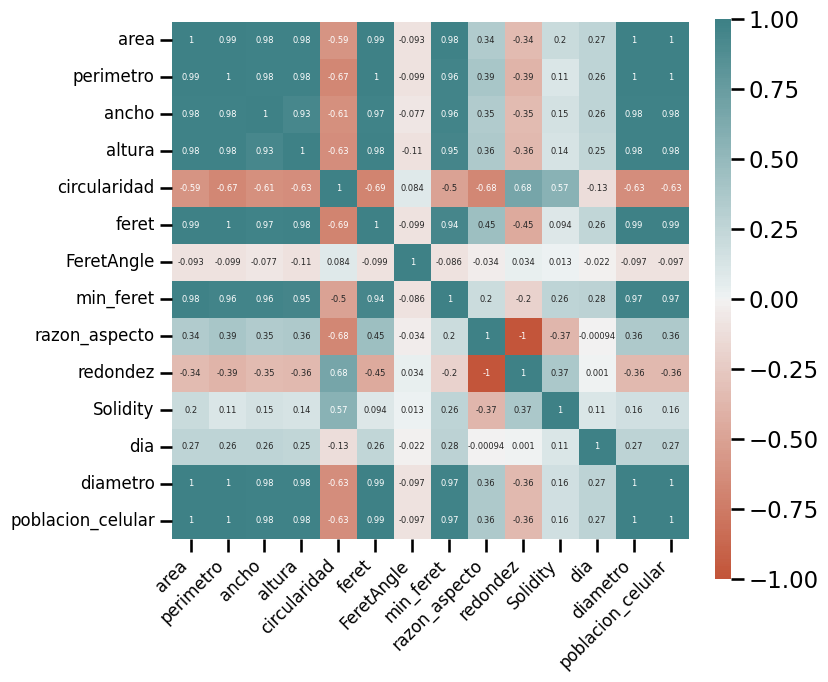

In [ ]:
# Mapa de calor de matriz de correlaciones
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))

# Crear un eje de color separado
cax = fig.add_axes([0.95, 0.15, 0.02, 0.7])

sns.heatmap(
    mat_corr,
    annot=True,
    cbar=True,
    annot_kws={"size": 6},
    vmin=-1,
    vmax=1,
    center=0,
    cmap=sns.diverging_palette(20, 200, n=200),
    square=True,
    ax=ax,
    cbar_ax=cax  # Asignar el eje de color separado
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right',
)

ax.tick_params(labelsize=12)

# Ajustar el espaciado entre el heatmap y la barra de color
fig.tight_layout(rect=[0, 0, 0.99, 0.88])

# Mostrar el plot
plt.show()

**Independecia entre variables numéricas usando el coeficiente de Pearson**

Con el coeficiente de correlación de Person se busca ver la **asociación lineal** entre las variables, según los valores se puede interpretar como,

- +1:   Correlación totalmente positiva
- +0.8: Correlación fuertemente positiva
- +0.6: Correlación moderadamente positiva
- 0:    Sin correlación
- -0.6: Correlación moderadamente negativa
- -0.8: Correlación fuertemente negativa
- -1:   Correlación totalmente negativa


Como ejemplo de pregunta a responder tenemos,

¿Hay una relación entre las variables `area` y `circularidad`?

- Ho: NO hay relación entre las variables (p_value > 0.05)
- H$_{1}$: HAY relación entre las variables


Observamos que el `diametro` y `circularidad`tiene una correlación positiva fuertemente y moderada, respectivamente con el `area` y esto nos lo confirma los valores de p_value de cada variables ya que p_value > 0.05. La correlación entre circularidad y diametro es relativamente débil negativa y el p_value confirma correlación.
Una valor de p_value = 0.745797 para `area` y `redondez`, nos dice que no hay correlación entre estas dos variables. Las otras correlaciones entre variables tienden a 0.

In [ ]:
import scipy.stats as stats
import pandas as pd
import numpy as np

col_corr = ['area', 'circularidad', 'diametro', 'redondez']
df_seleccionados = fiji_datos_clean_names[col_corr]

# Calcular la matriz de correlacion
cor_df_seleccionados = df_seleccionados.corr()

# Calcular el valor p de la correlación de Pearson para cada par de columnas
p_values = pd.DataFrame(index=df_seleccionados.columns, columns=df_seleccionados.columns)

for col1 in df_seleccionados.columns:
    for col2 in df_seleccionados.columns:
        if col1 != col2:
            corr, p_value = stats.pearsonr(df_seleccionados[col1], df_seleccionados[col2])
            p_values.loc[col1, col2] = p_value

# Convertir valores p a tipo numérico
p_values = p_values.astype(float)

# Imprimir la matriz de correlacion
print('\nMatriz de correlación:\n', cor_df_seleccionados, '\n')

# Imprimir la matriz de p-valor
print('\nMatriz de p-valores:\n', round(p_values, 8), '\n')



Matriz de correlación:
                   area  circularidad  diametro  redondez
area          1.000000     -0.273546  0.957783  0.010173
circularidad -0.273546      1.000000 -0.392000  0.695366
diametro      0.957783     -0.392000  1.000000 -0.073744
redondez      0.010173      0.695366 -0.073744  1.000000 


Matriz de p-valores:
                   area  circularidad  diametro  redondez
area               NaN           0.0  0.000000  0.745797
circularidad  0.000000           NaN  0.000000  0.000000
diametro      0.000000           0.0       NaN  0.018613
redondez      0.745797           0.0  0.018613       NaN 



In [ ]:
cor_df_seleccionados

,area,circularidad,diametro,redondez
area,1.000000,-0.273546,0.957783,0.010173
circularidad,-0.273546,1.000000,-0.392000,0.695366
diametro,0.957783,-0.392000,1.000000,-0.073744
redondez,0.010173,0.695366,-0.073744,1.000000


In [ ]:
p_values

,area,circularidad,diametro,redondez
area,NaN,6.270946e-19,0.000000e+00,7.457974e-01
circularidad,6.270946e-19,NaN,9.875652e-39,6.036053e-148
diametro,0.000000e+00,9.875652e-39,NaN,1.861336e-02
redondez,7.457974e-01,6.036053e-148,1.861336e-02,NaN


### 3.e) ¿La probabilidad de que la redondez ('Round') sea mayor a 0.9 en los clasificados como Esferoides = si es mayor que los clasificados como Esferoides = no?.

Si es mayor en un 20%

In [ ]:
# Supongamos que tienes los datos en un DataFrame llamado 'datos'
# con las columnas 'Redondez', 'Esferoides', y otras columnas si es necesario

# Filtrar los datos para los casos donde Esferoides = 'si'
esferoides_si = fiji_datos_clean_names[fiji_datos_clean_names['esferoide'] == 'si']

# Filtrar los datos para los casos donde Esferoides = 'no'
esferoides_no = fiji_datos_clean_names[fiji_datos_clean_names['esferoide'] == 'no']

# Calcular la probabilidad de redondez > 0.9 en los Esferoides = 'si'
probabilidad_si = len(esferoides_si[esferoides_si['redondez'] > 0.9]) / len(esferoides_si)

# Calcular la probabilidad de redondez > 0.9 en los Esferoides = 'no'
probabilidad_no = len(esferoides_no[esferoides_no['redondez'] > 0.9]) / len(esferoides_no)

print("Probabilidad de redondez > 0.9 en los Esferoides = 'si':", probabilidad_si)
print("Probabilidad de redondez > 0.9 en los Esferoides = 'no':", probabilidad_no)

Probabilidad de redondez > 0.9 en los Esferoides = 'si': 0.5593869731800766
Probabilidad de redondez > 0.9 en los Esferoides = 'no': 0.3528225806451613


# 4) Exploración muestras por día

### 4.a) ¿Cuántos datos hay por día? Hacer gráfico de frecuencias.

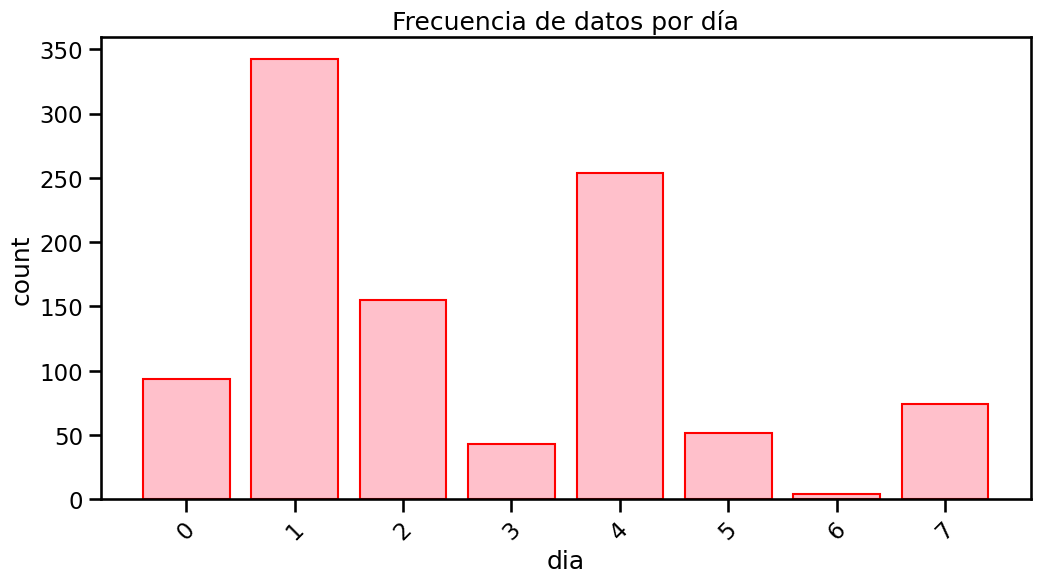

In [ ]:
#  número de datos por día
datos_por_dia = fiji_datos_clean_names['dia'].value_counts().sort_index()

#gráfico de frecuencias
plt.figure(figsize=(12, 6))
plt.bar(datos_por_dia.index, datos_por_dia.values, edgecolor = 'red', color = 'pink')
plt.title('Frecuencia de datos por día')
plt.xlabel('dia')
plt.ylabel('count')
plt.xticks(rotation=45)
plt.show()

Se observa que al día 6 hay MUY pocos datos y en otros días más, esto da el índice de un dataset muy desbalancedo en sus etiquetas. Esto es un inconveniente para la interpretación de los modelos, lo que se podría hacer es elimar ese index de esa variable.

In [ ]:
datos_por_dia

0     94
1    342
2    155
3     43
4    254
5     52
6      4
7     74
Name: dia, dtype: int64

### 4.b) Explorar con diagramas de cajas al menos una columna (ej. Diameter, n_diam, pero pueden animarse a más).

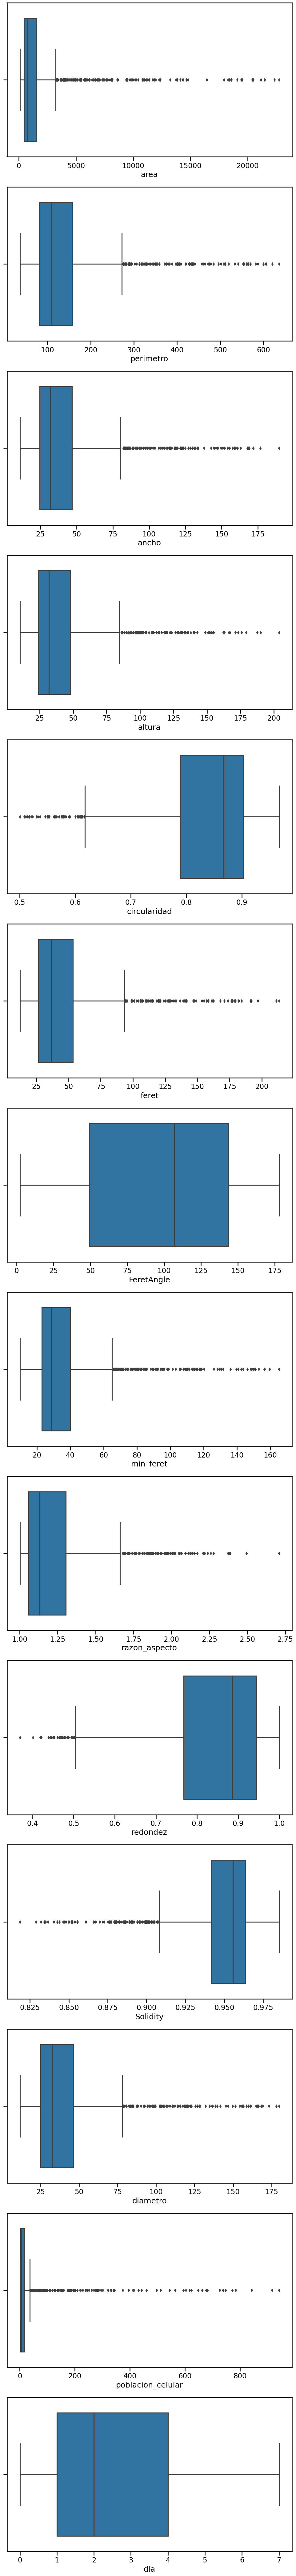

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Especificar las columnas para el diagrama de caja
cols = ['area', 'perimetro', 'ancho', 'altura', 'circularidad', 'feret', 'FeretAngle', 'min_feret',
        'razon_aspecto', 'redondez', 'Solidity', 'diametro', 'poblacion_celular', 'dia']

# Crear diagramas de caja individuales
fig, axs = plt.subplots(nrows=len(cols), figsize=(10, 6*len(cols)))
for i, col in enumerate(cols):
    ax = axs[i]
    sns.boxplot(x=fiji_datos_clean_names[col], ax=ax)
    ax.set_xlabel(col)

plt.tight_layout()
plt.show()

### 4.c) Discriminar la(s) columna(s) elegida(s) en Esferoide si y no y ver sus distribuciones. ¿Son distintas?. Describirlas (asimetría, kurtosis, etc..)

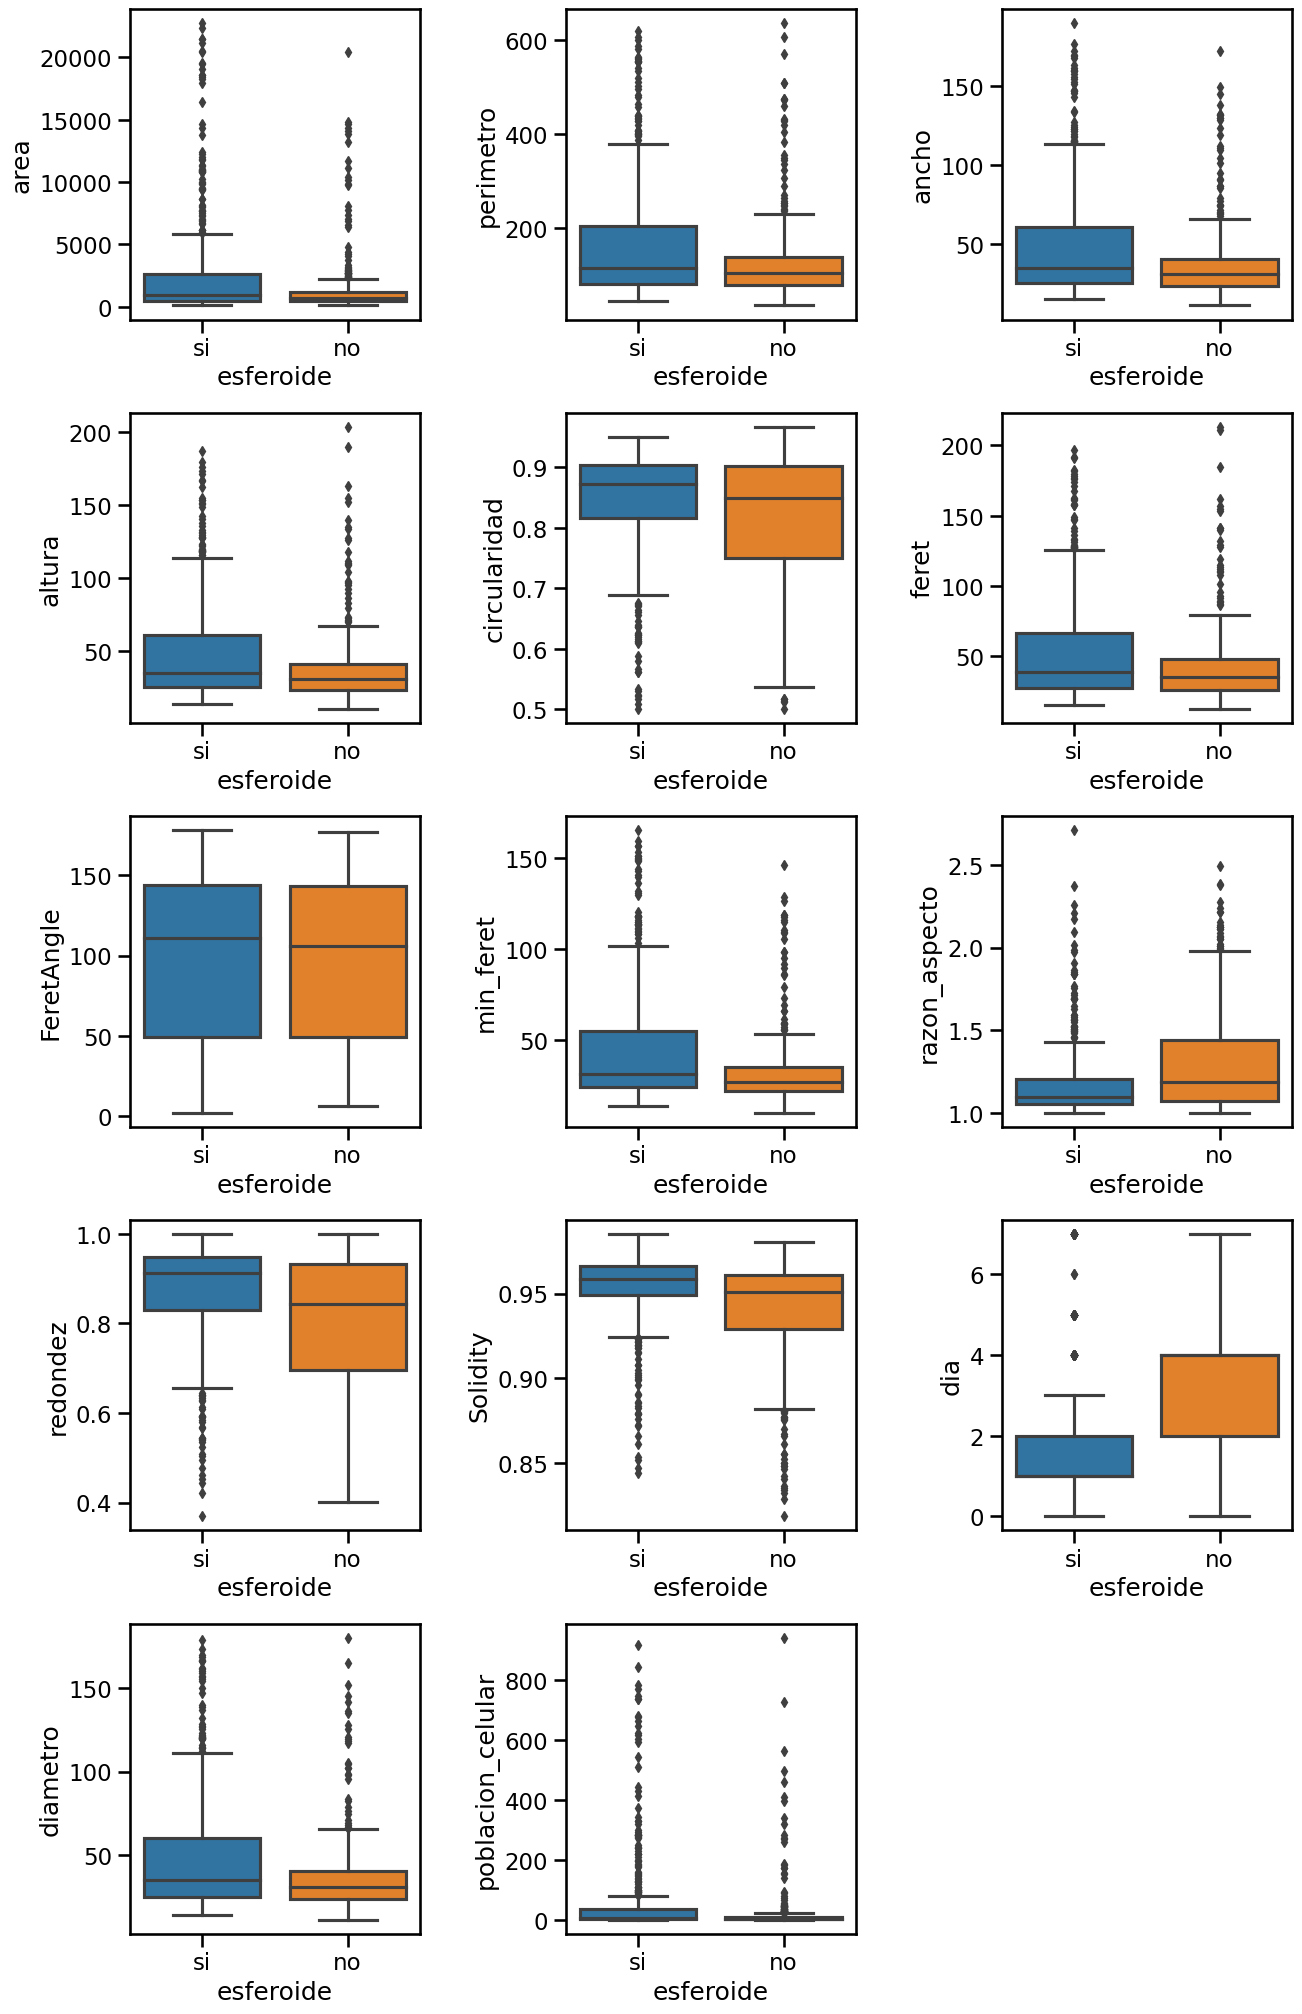

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Obtener la lista de nombres de columnas numéricas
num_cols = [col for col in num_cols_df.columns]

#  Calcular el numero de filas y columnas para el arreglo del subplot
num_rows = (len(num_cols) - 1) // 3 + 1
num_cols_subplot = min(len(num_cols), 3)

# configurar el arreglo del subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols_subplot, figsize=(15, 5*num_rows),
                          gridspec_kw={'hspace': 0.3, 'wspace': 0.5})

# Aplanar la matriz de ejes
axes = axes.flatten()

# Crear subplots para cada variable numérica contra la variable categórica
for i, column in enumerate(num_cols):
    sns.boxplot(data=fiji_datos_clean_names, x='esferoide', y=column, ax=axes[i])
    axes[i].set_ylabel(column)

# Eliminar subplots vacíos si es necesario
if len(num_cols) < len(axes):
    for j in range(len(num_cols), len(axes)):
        fig.delaxes(axes[j])

plt.xlabel('esferoide')
# Adjustar el diseño
plt.tight_layout()

# Mostrar el plot
plt.show()

Como se observó anteriormente en el histograma y acá en el boxplot, las varaibles `poblacion_celular`' y `area` son quines presentan mayor cantidad de outliers, las otras variables también presentan unos cuantos a excepción de `FeretAngle` que no presenta ninguno pero a la vez esta variable no parece influir sobre esferoide y podría ser una columna que se pueda eliminar del dataset.

### 4.d) ¿Hay outliers? Hacer con el total y luego discriminando por Esferoide' si y no. ¿Qué pueden implicar biológicamente? Si los eliminan, ¿cuál sería la justificación?

Vemos que debemos remover outliers en `poblacion_celular`' y `area` que nos quienes tienen aoutlier bastante aljados del cuarto cuartil. No sacamos de otras variables porque la cantidad de datos totales no es muy grande y remover outlier en todas aquellas que presenten, podemos perder información.

In [ ]:
import pandas as pd
import numpy as np
# ==============================================================================
# Función para obtener remover valores atípicos usando el método de rango intercuartílico (IQR)
# ==============================================================================
def remove_outliers_iqr(dataframe, column_name, lower_bound=0.25, upper_bound=0.75):
   # Calcular el rango IQR
    q1 = dataframe[column_name].quantile(lower_bound)
    q3 = dataframe[column_name].quantile(upper_bound)
    iqr = q3 - q1

    # Definir los límites inferior y superior para los valores atípicos
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)

    # Filtrar los valores atípicos
    filtered_data = dataframe[(dataframe[column_name] >= lower_bound) & (dataframe[column_name] <= upper_bound)]

    return filtered_data

In [ ]:
# num_cols_df = num_cols_df.astype(float)
# num_cols_df.info()

In [ ]:
###Remover outliers
df_outlier_removed = remove_outliers_iqr(fiji_datos_clean_names, 'poblacion_celular')
df_outlier_removed = remove_outliers_iqr(df_outlier_removed, 'area')

print(fiji_datos_clean_names.shape)
print(df_outlier_removed.shape)
df_outlier_removed.isnull().sum()

(1018, 16)
(813, 16)


nombre_id            0
area                 0
perimetro            0
ancho                0
altura               0
circularidad         0
feret                0
FeretAngle           0
min_feret            0
razon_aspecto        0
redondez             0
Solidity             0
esferoide            0
dia                  0
diametro             0
poblacion_celular    0
dtype: int64

In [ ]:
df_outlier_removed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 813 entries, 0 to 1017
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   nombre_id          813 non-null    object 
 1   area               813 non-null    float64
 2   perimetro          813 non-null    float64
 3   ancho              813 non-null    float64
 4   altura             813 non-null    float64
 5   circularidad       813 non-null    float64
 6   feret              813 non-null    float64
 7   FeretAngle         813 non-null    float64
 8   min_feret          813 non-null    float64
 9   razon_aspecto      813 non-null    float64
 10  redondez           813 non-null    float64
 11  Solidity           813 non-null    float64
 12  esferoide          813 non-null    object 
 13  dia                813 non-null    int64  
 14  diametro           813 non-null    float64
 15  poblacion_celular  813 non-null    float64
dtypes: float64(13), int64(1),

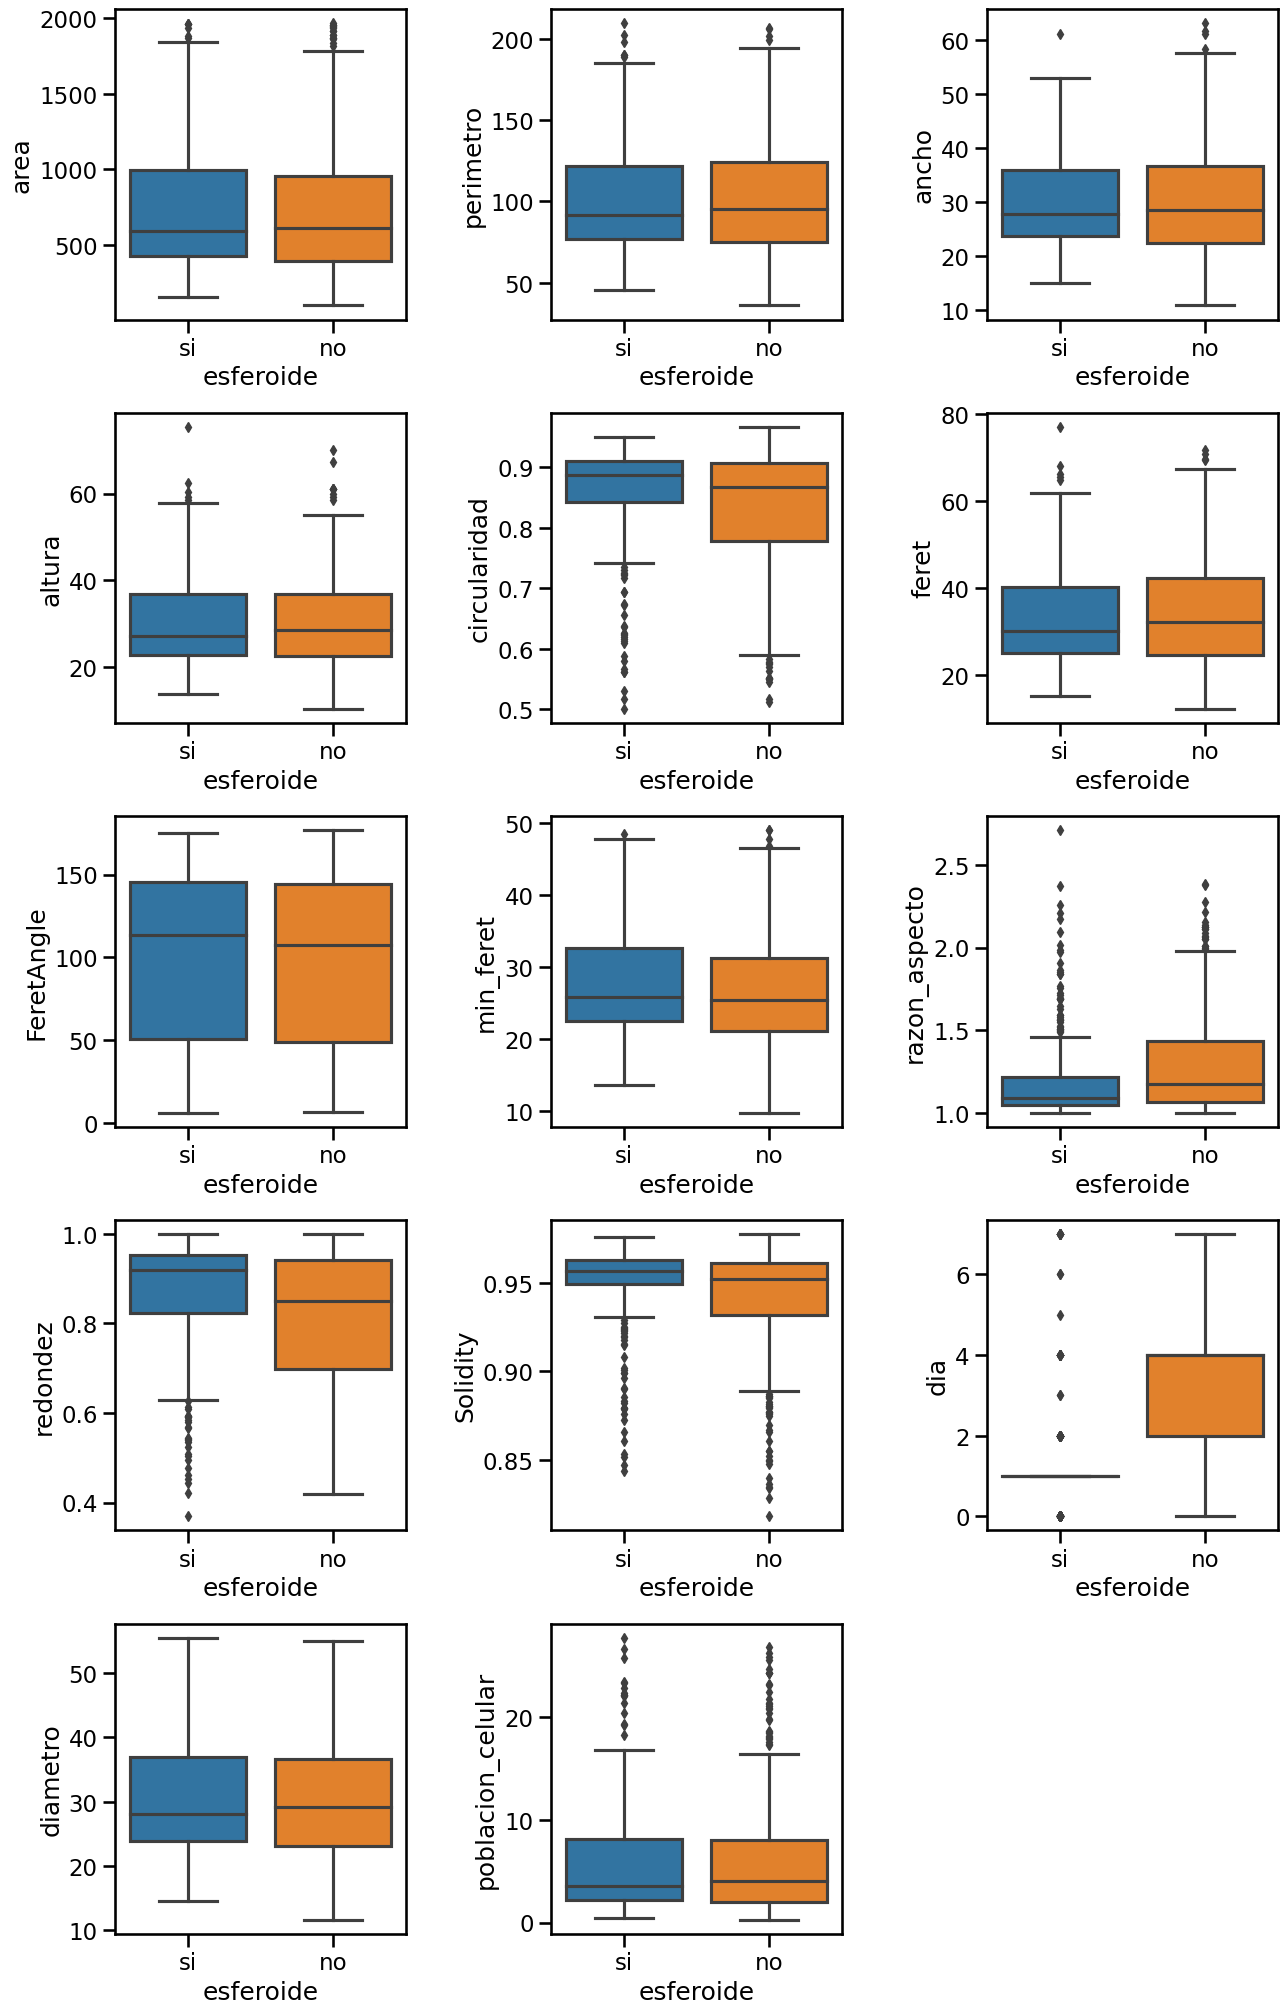

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Obtener la lista de nombres de columnas numéricas
num_cols = [col for col in num_cols_df.columns]

# Calcule el número de filas y columnas para el arreglo del subplots
num_rows = (len(num_cols) - 1) // 3 + 1
num_cols_subplot = min(len(num_cols), 3)

# Configurar el arreglo de los subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols_subplot, figsize=(15, 5*num_rows),
                          gridspec_kw={'hspace': 0.3, 'wspace': 0.5})

# Aplanar la matriz de ejes
axes = axes.flatten()

# Crear subplots para cada variable numérica contra la variable categórica
for i, column in enumerate(num_cols):
    sns.boxplot(data=df_outlier_removed, x='esferoide', y=column, ax=axes[i])
    axes[i].set_ylabel(column)

# Eliminar subplots vacíos si es necesario
if len(num_cols) < len(axes):
    for j in range(len(num_cols), len(axes)):
        fig.delaxes(axes[j])

plt.xlabel('esferoide')
# Ajustar el diseño
plt.tight_layout()

# Mostrar el plot
plt.show()


Se observa que con solo remover los outliers de `area` y `poblacion_celular`, las demás variables presentan menos outliers. Sin embargo, en la variable `dia` la respuesta "si" de '`esferoide`' practicameente quedó sin datos.

### 4.e) La media de los esferoides=no al día 3 es igual que al día 5? Realizar Test de Hipótesis.

In [ ]:
import numpy as np
from scipy.stats import t


# Filtrar los datos para los casos donde Esferoides = 'no' y los respectivos dias
esferoides_no_3 = fiji_datos_clean_names[fiji_datos_clean_names['esferoide'] == 'no'][fiji_datos_clean_names['dia'] == 3]
esferoides_no_5 = fiji_datos_clean_names[fiji_datos_clean_names['esferoide'] == 'no'][fiji_datos_clean_names['dia'] == 5]

# Calcular la media y desviación estándar de cada conjunto de datos
mean1 = np.mean(esferoides_no_3)
mean2 = np.mean(esferoides_no_5)
std1 = np.std(esferoides_no_3, ddof=1)
std2 = np.std(esferoides_no_5, ddof=1)

# Calcular el tamaño de muestra y los grados de libertad
n1 = len(esferoides_no_3)
n2 = len(esferoides_no_5)
df = n1 + n2 - 2

# Calcular estadistico T
t_statistic = (mean1 - mean2) / np.sqrt((std1**2 / n1) + (std2**2 / n2))

# Bilateral
p_value = 2 * (1 - t.cdf(np.abs(t_statistic), df))

print("diferencia de Media: ","\n", (mean1 - mean2),"\n\n")
print("Estadístico T:","\n",round(t_statistic,5),"\n\n")
print("Valor p:","\n", p_value)

diferencia de Media:  
 area                 1334.443897
perimetro              48.138326
ancho                  12.004067
altura                 14.953576
circularidad           -0.012982
feret                  16.910783
FeretAngle             17.159942
min_feret              10.145022
razon_aspecto           0.047614
redondez               -0.043299
Solidity                0.001360
dia                    -2.000000
diametro               13.527902
poblacion_celular      48.963056
dtype: float64 


Estadístico T: 
 area                 1.84338
perimetro            1.69962
ancho                1.61705
altura               1.74133
circularidad        -0.39249
feret                1.73535
FeretAngle           1.14941
min_feret            1.74672
razon_aspecto        0.52632
redondez            -0.99764
Solidity             0.14150
dia                     -inf
diametro             1.75355
poblacion_celular    1.60259
dtype: float64 


Valor p: 
 [0.07158386 0.09581167 0.11256139 0.08816838

### 4.f) Determinen el intervalo de confianza diario de tal(es) columna(s) para las clasificadas como 'Esferoide'='si'. Y exploren como utilizarlos como barras de error en el gráfico.

In [ ]:
#Seleccion de los datos "Esferoides = si"
esferoides = fiji_datos_clean_names[fiji_datos_clean_names['esferoide'] == 'si']

# Definir intervalo de confianza
confianza = 0.95

# Calcular la media y desviación estándar de cada variable
medias = esferoides.mean()
std_error = esferoides.std() / np.sqrt(len(esferoides))

# Calcular grados de libertad y valor critico
grados_libertad = len(esferoides) - 1
t_critical = t.ppf(1 - (1 - confianza) / 2, df=grados_libertad)

# Calcular intervalos de confianza.
intervalos_confianza = pd.DataFrame({'Intervalo inferior': medias - t_critical * std_error,
                                    'Intervalo superior': medias + t_critical * std_error})
print(intervalos_confianza)

                   Intervalo inferior  Intervalo superior
area                      2221.745272         2923.390776
perimetro                  153.082551          173.581992
ancho                       45.270215           51.173747
altura                      45.412132           51.302534
circularidad                 0.837124            0.851755
feret                       49.541651           55.900838
FeretAngle                  91.732763          100.615658
min_feret                   41.601850           47.007515
razon_aspecto                1.154818            1.191652
redondez                     0.862625            0.882161
Solidity                     0.952426            0.956155
dia                          1.746033            2.062396
diametro                    45.583317           51.442610
poblacion_celular           45.265850           68.861686


In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import sem

#Seleccion de los datos "Esferoides = si"
esferoides = fiji_datos_clean_names[fiji_datos_clean_names['esferoide'] == 'si']

# Seleccionar solo las columnas numéricas
columnas_numericas = esferoides.select_dtypes(include=['int', 'float']).columns

# Calcular el error estándar solo para las columnas numéricas
error_estandar = esferoides[columnas_numericas].apply(lambda x: sem(x))

# Imprimir el error estándar de las columnas numéricas
print("Error estándar: \n")
print(error_estandar)

Error estándar: 

area                 178.578674
perimetro              5.217397
ancho                  1.502532
altura                 1.499190
circularidad           0.003724
feret                  1.618503
FeretAngle             2.260822
min_feret              1.375818
razon_aspecto          0.009375
redondez               0.004972
Solidity               0.000949
dia                    0.080519
diametro               1.491273
poblacion_celular      6.005473
dtype: float64


In [ ]:
intervalos_confianza

,Intervalo inferior,Intervalo superior
area,2221.745272,2923.390776
perimetro,153.082551,173.581992
ancho,45.270215,51.173747
altura,45.412132,51.302534
circularidad,0.837124,0.851755
feret,49.541651,55.900838
FeretAngle,91.732763,100.615658
min_feret,41.601850,47.007515
razon_aspecto,1.154818,1.191652
redondez,0.862625,0.882161


# 5) ¿Qué otras preguntas se pueden o quisieran plantear?

Consideramos que es importante realzar un análsis univariado más en detalle para cada variable con el objetivo de saber cuál son esas variables capaces de generar "buenas" predicciones respecto a la variable a predecir.

Esto se conoce como análisis univariado.

⚠️⚠️⚠️ ADVERTENCIA ⚠️⚠️⚠️

Este análisis nos mostrará sólo una faceta de las posibles relaciones entre una cada variable predictora y la variable a predecir, y no es suficiente para extraer conclusiones definitivas.

In [ ]:
##Para esta parte trabajamos con los datos sin remover outliers
data = fiji_datos_clean_names.copy(deep=True)
data

,nombre_id,area,perimetro,ancho,altura,circularidad,feret,FeretAngle,min_feret,razon_aspecto,redondez,Solidity,esferoide,dia,diametro,poblacion_celular
0,Esferas_BT474_dia_0_well_1_100X_1_blob_1,324.4440,67.3603,21.0598,19.7011,0.8985,22.2117,23.4287,19.7011,1.0653,0.9387,0.9500,si,0,20.95640,1.491357
1,Esferas_BT474_dia_0_well_1_100X_1_blob_2,497.5115,82.8004,25.8152,25.1359,0.9119,26.8751,16.1443,25.1289,1.0475,0.9546,0.9569,si,0,26.00200,2.848733
2,Esferas_BT474_dia_0_well_1_100X_1_blob_3,282.9078,62.1586,19.7011,18.3424,0.9201,20.4370,15.4222,18.3424,1.0395,0.9620,0.9519,si,0,19.38970,1.181258
3,Esferas_BT474_dia_0_well_1_100X_1_blob_5,500.7421,84.5571,26.4946,25.1359,0.8801,26.6336,174.1440,25.1359,1.0278,0.9730,0.9493,si,0,25.88475,2.810370
4,Esferas_BT474_dia_0_well_1_100X_1_blob_6,492.8964,82.0728,25.1359,24.4565,0.9195,26.2232,143.4270,24.4565,1.0186,0.9817,0.9643,si,0,25.33985,2.636596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1013,Esferas_BT474_dia_7_well_2_100X_5_blob_2,539.0477,87.0414,25.1359,28.5326,0.8941,29.6744,105.9454,25.1359,1.1762,0.8502,0.9570,no,7,27.40515,3.335248
1014,Esferas_BT474_dia_7_well_2_100X_5_blob_4,277.8311,62.5566,18.3424,19.7011,0.8922,21.7497,128.6598,18.1132,1.2288,0.8138,0.9473,no,7,19.93145,1.283064
1015,Esferas_BT474_dia_7_well_2_100X_5_blob_5,435.6687,77.6671,20.3804,25.8152,0.9076,27.0718,107.5256,20.3804,1.2472,0.8018,0.9657,no,7,23.72610,2.164266
1016,Esferas_BT474_dia_7_well_2_100X_6_blob_3,531.2020,89.5939,26.4946,26.4946,0.8316,31.2795,34.3803,24.9780,1.2569,0.7956,0.9350,no,7,28.12875,3.606474


# Análisis univariado

In [ ]:
# Comencemos representando la variable a predecir de forma binaria:
# 'si' = 1, 'no' = 0
diccionario = {'si':1, 'no':0}
binario = data['esferoide'].map(diccionario)
data['y_bin'] = binario
# De esta forma resulta fácil calcular la tasa de conversión: el promedio
# de la columna 'y_bin'

In [ ]:
# Función para graficar tasas de conversión

def graficar_tasas_conversion(var_predictora, var_predecir, type='line', order=None):
    x, y = var_predictora, var_predecir

    # Generar agrupaciones (groupby), calcular tasa de conversión (mean),
    # multiplicarla por 100 (mul(100))
    grupo = data.groupby(x)[y].mean().mul(100).rename('tasa_conv').reset_index()

    # Y generar gráfica
    if type=='line': # Útil para rangos continuos
        plt.figure(figsize=(10,6))
        sns.lineplot(x=var_predictora, y='tasa_conv', data=grupo)
    elif type=='bar': # Útil si los datos están divididos en rangos o son categóricos
        plt.figure(figsize=(14,6))
        sns.barplot(x=var_predictora, y='tasa_conv', data=grupo, order=order).grid(axis='y', color='black', alpha=0.3)
    elif type=='scatter': # Útil si los datos están divididos en rangos o son categóricos
        plt.figure(figsize=(10,6))
        sns.scatterplot(x=var_predictora, y='tasa_conv', data=grupo)

In [ ]:
data.columns

Index(['nombre_id', 'area', 'perimetro', 'ancho', 'altura', 'circularidad',
       'feret', 'FeretAngle', 'min_feret', 'razon_aspecto', 'redondez',
       'Solidity', 'esferoide', 'dia', 'diametro', 'poblacion_celular',
       'y_bin'],
      dtype='object')

## dia

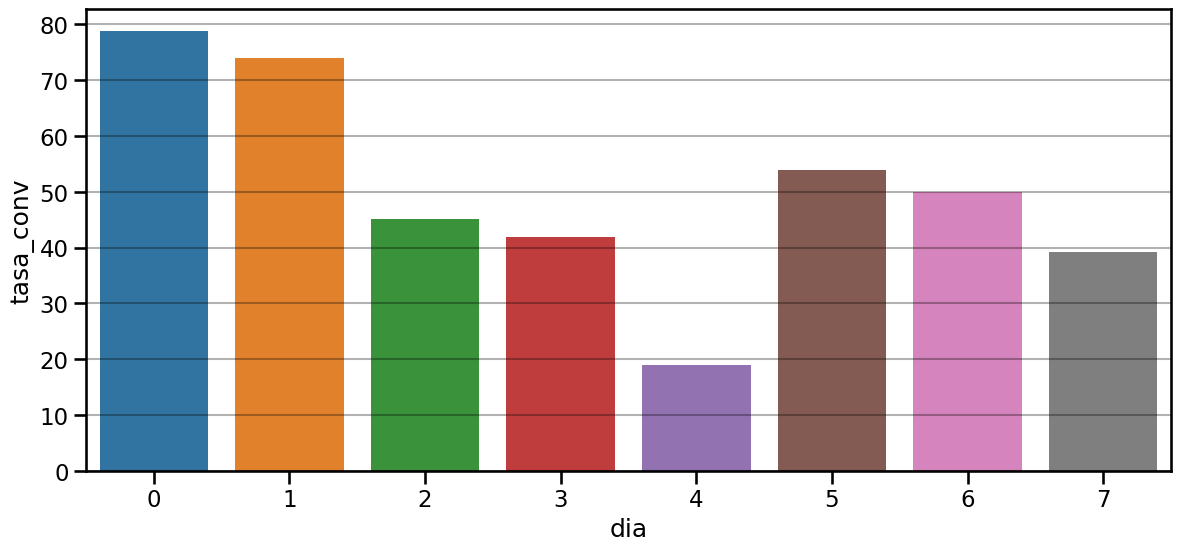

In [ ]:
# Y graficar las tasas de conversión para la variable día
## solo de esta realizar un barplor porque tiene pocos valores únicos
graficar_tasas_conversion('dia','y_bin', type='bar')

In [ ]:
print('Cardinalidad:', data['dia'].nunique())
print()
print('Cuentas para cada día:')
print(data['dia'].value_counts())
print()
print('Cuentas en porcentaje para cada día:')
print(100*data['dia'].value_counts(normalize=True).iloc[:10])

Cardinalidad: 8

Cuentas para cada día:
1    342
4    254
2    155
0     94
7     74
5     52
3     43
6      4
Name: dia, dtype: int64

Cuentas en porcentaje para cada día:
1    33.595285
4    24.950884
2    15.225933
0     9.233792
7     7.269155
5     5.108055
3     4.223969
6     0.392927
Name: dia, dtype: float64


Antes de analizar el gráfico rescatanos los datos que de cardinalidad donde se observa que 1-2-4 son los que representan cerca del ~74% de los datos y el dia = 6 cuenta con tan solo 4 datos.

Del gráfico vemos que al **día 0 y 1** son los que presentan mayor  tasa de converción, es decir, del total de los datos los colectados en esos días más 70% influyen en la variable respuesta "esferoide". De forma general se observa que entre los diferentes días hay diferenicas entre las tasas, por lo tanto, podemos concluir asi a primera vista que la variable `dia` podría ser una variable predictora para nuestra variable respesta, `esferoide`.

Para el resto de las variables como cada una tiene muchos valores únicos, conviene realizar un scatterplot.

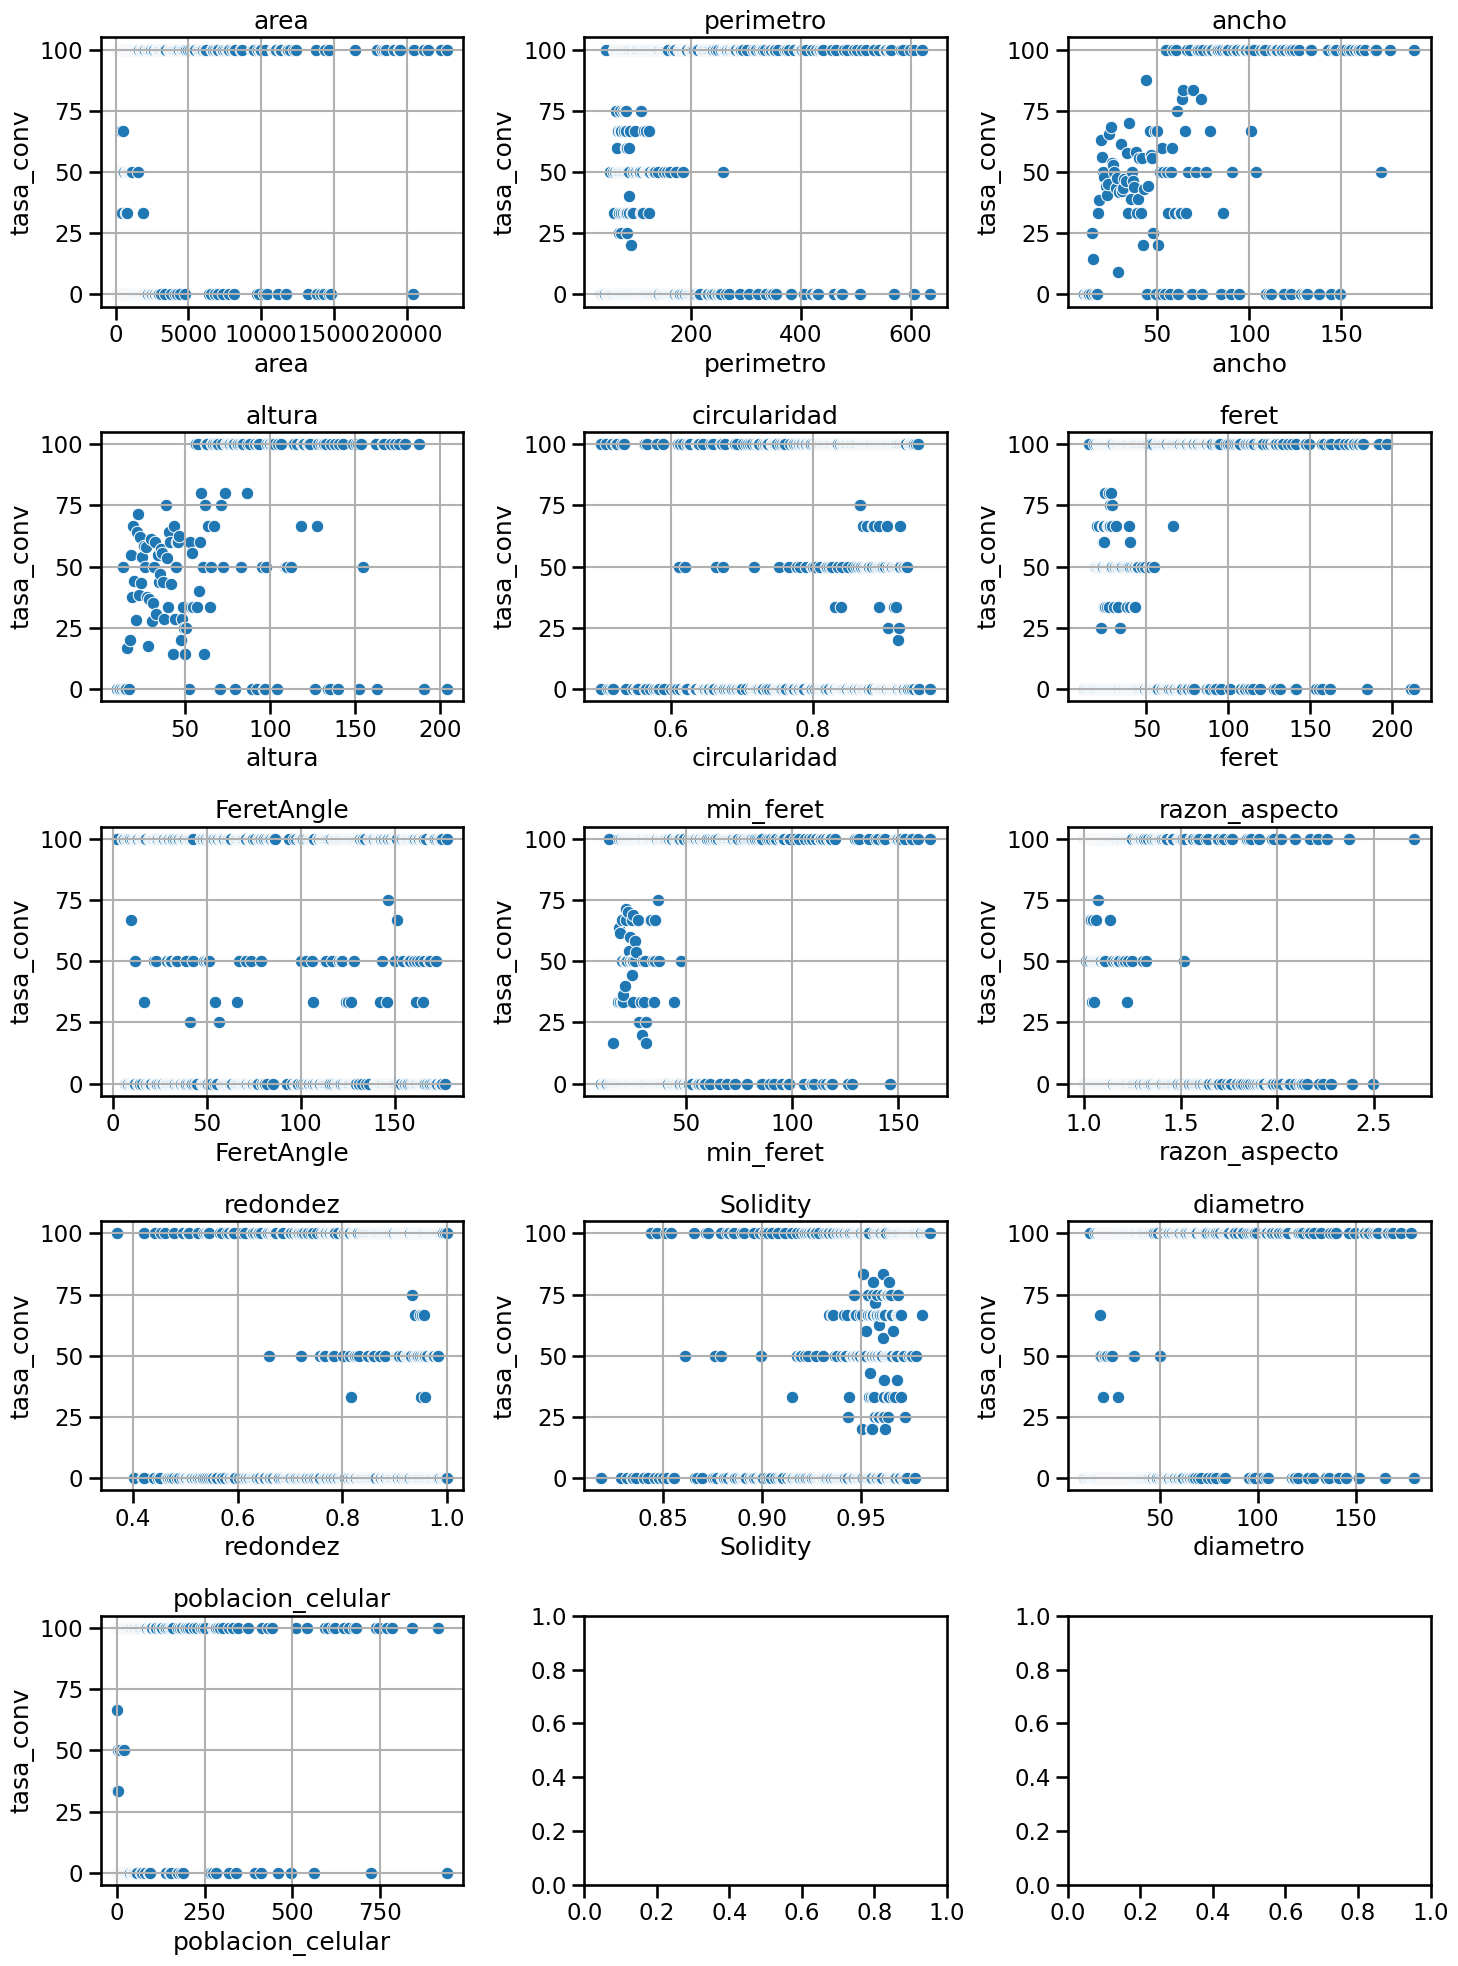

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def graficar_tasas_conversion(var_predictora, var_predecir, type='line', order=None):
    x, y = var_predictora, var_predecir

    # Generar agrupaciones (groupby), calcular tasa de conversión (mean),
    # multiplicarla por 100 (mul(100))
    grupo = data.groupby(x)[y].mean().mul(100).rename('tasa_conv').reset_index()

    # Y generar gráfica
    if type == 'line': # Útil para rangos continuos
        sns.lineplot(x=var_predictora, y='tasa_conv', data=grupo)
        plt.grid()
    elif type == 'bar': # Útil si los datos están divididos en rangos o son categóricos
        sns.barplot(x=var_predictora, y='tasa_conv', data=grupo, order=order)
        plt.grid(axis='y', color='black', alpha=0.2)
    elif type == 'scatter': # Útil si los datos están divididos en rangos o son categóricos
        sns.scatterplot(x=var_predictora, y='tasa_conv', data=grupo)
        plt.grid()

var_predictora = ['area', 'perimetro', 'ancho', 'altura', 'circularidad', 'feret', 'FeretAngle', 'min_feret',
                  'razon_aspecto', 'redondez', 'Solidity', 'diametro', 'poblacion_celular']
var_predecir = 'y_bin'

fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 20))
fig.subplots_adjust(hspace=0.5)

for i, var in enumerate(var_predictora):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    plt.sca(ax)  # Establecer el subplot actual como el "current axes"
    graficar_tasas_conversion(var, var_predecir, type='scatter')
    plt.title(var)

plt.tight_layout()
plt.show()


Con el gráfco anterior no podemos ver alguna tendencia o grupos que nos permita realizar algunas deducciones del dataset ya que en el scatter estan muy dispersos, pero podemos recurrir a realizar algunos rangos de datos por columna que nos permita extraer información.

In [ ]:
data.describe()

,area,perimetro,ancho,altura,circularidad,feret,FeretAngle,min_feret,razon_aspecto,redondez,Solidity,dia,diametro,poblacion_celular,y_bin
count,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000
mean,1948.874361,144.493180,42.462574,42.685466,0.830163,47.328600,95.952755,38.195012,1.237618,0.837940,0.947258,2.553045,42.761806,40.202463,0.512770
std,3366.692373,104.611513,29.711988,30.275809,0.097560,32.787878,51.288792,26.796383,0.273783,0.138929,0.027233,1.945076,29.586773,113.927112,0.500083
min,100.148400,36.082000,10.869600,10.190200,0.500300,12.247100,2.174700,9.722300,1.000800,0.369200,0.818500,0.000000,11.558350,0.250218,0.000000
25%,460.590400,81.276900,24.456500,23.777200,0.788775,26.633600,49.192225,22.830425,1.059225,0.767250,0.941400,1.000000,25.116862,2.567602,0.000000
50%,781.803800,109.837800,31.929300,31.929300,0.867000,36.527200,106.839900,28.494600,1.128800,0.885850,0.955500,2.000000,32.789700,5.712732,1.000000
75%,1570.761125,158.337000,46.875000,48.063850,0.902950,53.490825,143.579475,39.849075,1.303325,0.944100,0.963600,4.000000,46.430662,16.219830,1.000000
max,22735.999500,635.872400,189.538000,203.804300,0.966700,213.226500,177.811400,165.233000,2.708700,0.999200,0.985100,7.000000,179.769300,941.408471,1.000000


## area

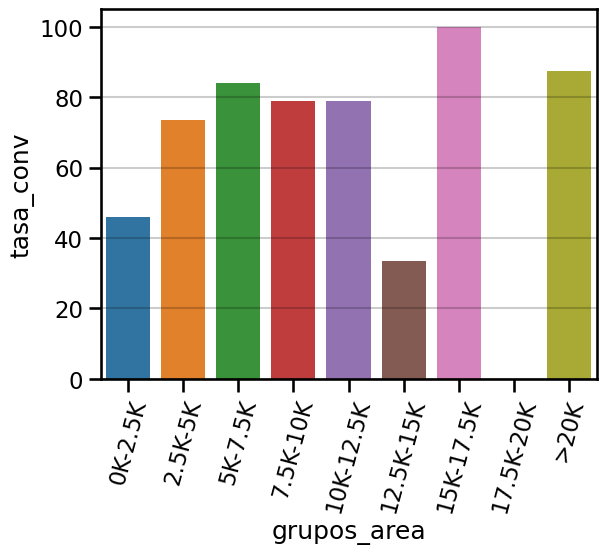

In [ ]:
# Nueva columna en el dataset: "grupos_area"

data.loc[(data['area']>=0) & (data['area']<2500),'grupos_area'] = "0K-2.5K"
data.loc[(data['area']>=2500) & (data['area']<5000),'grupos_area'] = "2.5K-5K"
data.loc[(data['area']>=5000) & (data['area']<7500),'grupos_area'] = "5K-7.5K"
data.loc[(data['area']>=7500) & (data['area']<10000),'grupos_area'] = "7.5K-10K"
data.loc[(data['area']>=10000) & (data['area']<12500),'grupos_area'] = "10K-12.5K"
data.loc[(data['area']>=12500) & (data['area']<15000),'grupos_area'] = "12.5K-15K"
data.loc[(data['area']>=15000) & (data['area']<17500),'grupos_area'] = "15K-17.5K"
data.loc[(data['area']>=17500) & (data['area']<2000),'grupos_area'] = "17.5K-20K"
data.loc[data['area']>=20000,'grupos_area'] = ">20K"

# Y grafiquemos la tasa de conversión para esta nueva columna
#graficar_tasas_conversion('grupos_area','y_bin',type='bar')
orden = ["0K-2.5K", "2.5K-5K", "5K-7.5K", "7.5K-10K", "10K-12.5K", "12.5K-15K", "15K-17.5K", '17.5K-20K', '>20K']
graficar_tasas_conversion('grupos_area','y_bin',type='bar', order=orden)

# Rotar las etiquetas del eje x en 45 grados
plt.xticks(rotation=75)
plt.show()

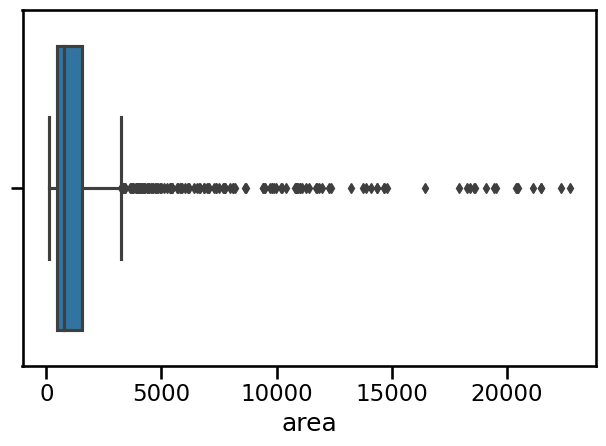

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=data['area'])
plt.xlabel('area')
plt.tight_layout()
# plt.xlim(0,5000)
plt.show()

In [ ]:
# Calcular la frecuencia de cada grupo
grupo_frecuencia = data['grupos_area'].value_counts()

# Calcular el porcentaje de cada grupo
grupo_porcentaje = grupo_frecuencia / len(data) * 100

# Imprimir los resultados
print("Porcentaje de cada grupo:")
print(grupo_porcentaje)


Porcentaje de cada grupo:
0K-2.5K      82.514735
2.5K-5K       8.153242
5K-7.5K       3.045187
7.5K-10K      1.866405
10K-12.5K     1.866405
12.5K-15K     0.884086
>20K          0.785855
15K-17.5K     0.098232
Name: grupos_area, dtype: float64


De la variable `area` se observa que en el primer grupo 0K-2.5K esta el 82% de los datos lo cual no nos conviene agrupar de esa forma, por lo tanto, haciendo uso del boxplot de area, vamos a realizar otra forma de agrupar.

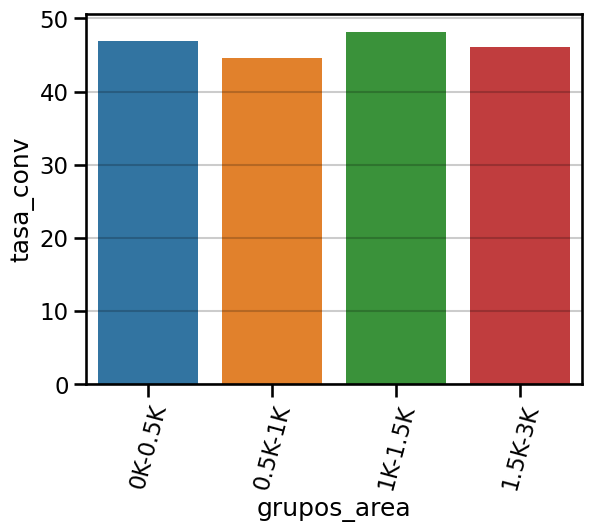

In [ ]:
# Nueva columna en el dataset: "grupos_area"

data.loc[(data['area']>=0) & (data['area']<500),'grupos_area'] = "0K-0.5K"
data.loc[(data['area']>=500) & (data['area']<1000),'grupos_area'] = "0.5K-1K"
data.loc[(data['area']>=1000) & (data['area']<1500),'grupos_area'] = "1K-1.5K"
data.loc[(data['area']>=1500) & (data['area']<3000),'grupos_area'] = "1.5K-3K"
data.loc[data['area']>=5000,'grupos_area'] = ">5K"

# Y grafiquemos la tasa de conversión para esta nueva columna
#graficar_tasas_conversion('grupos_area','y_bin',type='bar')
orden = [ "0K-0.5K", "0.5K-1K",  "1K-1.5K", "1.5K-3K"]
graficar_tasas_conversion('grupos_area','y_bin',type='bar', order=orden)

# Rotar las etiquetas del eje x en 45 grados
plt.xticks(rotation=75)
plt.show()

In [ ]:
# Calcular la frecuencia de cada grupo
grupo_frecuencia = data['grupos_area'].value_counts()

# Calcular el porcentaje de cada grupo
grupo_porcentaje = grupo_frecuencia / len(data) * 100

# Imprimir los resultados
print("Porcentaje de cada grupo:")
print(grupo_porcentaje)

Porcentaje de cada grupo:
0.5K-1K    30.648330
0K-0.5K    30.157171
1K-1.5K    13.261297
1.5K-3K    11.296660
>5K         9.332024
2.5K-5K     5.304519
Name: grupos_area, dtype: float64


Ahora sí se ve que los datos o grupos estan mejor distribuidos y como era de esperarse los grupos* 2.5K-5K*  y *>5K* son los que tienen mejor porcentaje de datos ya que como se observó en el boxplot de `area` esa zona corresponde a los outliers.

Lo que sí se observa de forma general es que al parecer el `area` no tiene influencia sobre la variable respuesta, ya que el cambio en tasa de convertilidad es muy pequeño. Por lo tanto, podría ser una variable que se pueda eliminar porque no es predictora en la variable de interés.

## perimetro

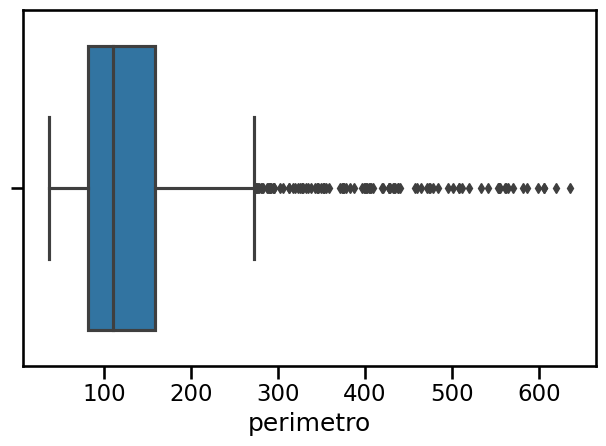

count    1018.000000
mean      144.493180
std       104.611513
min        36.082000
25%        81.276900
50%       109.837800
75%       158.337000
max       635.872400
Name: perimetro, dtype: float64

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=data['perimetro'])
plt.xlabel('perimetro')
plt.tight_layout()
# plt.xlim(0,300)
plt.show()

data['perimetro'].describe()

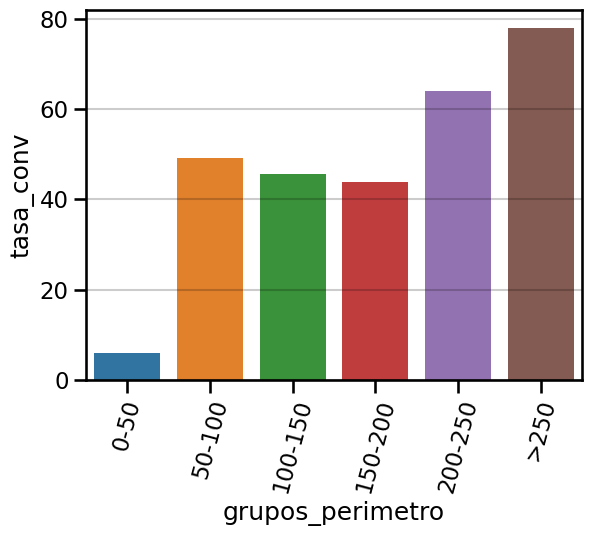

Porcentaje de cada grupo:
50-100     41.552063
100-150    29.076621
>250       12.082515
150-200     9.626719
200-250     5.992141
0-50        1.669941
Name: grupos_perimetro, dtype: float64


In [ ]:
# Nueva columna en el dataset: "grupos_perimetro"

data.loc[(data['perimetro']>=0) & (data['perimetro']<50),'grupos_perimetro'] = "0-50"
data.loc[(data['perimetro']>=50) & (data['perimetro']<100),'grupos_perimetro'] = "50-100"
data.loc[(data['perimetro']>=100) & (data['perimetro']<150),'grupos_perimetro'] = "100-150"
data.loc[(data['perimetro']>=150) & (data['perimetro']<200),'grupos_perimetro'] = "150-200"
data.loc[(data['perimetro']>=200) & (data['perimetro']<250),'grupos_perimetro'] = "200-250"
data.loc[data['perimetro']>=250,'grupos_perimetro'] = ">250"

# Y grafiquemos la tasa de conversión para esta nueva columna
#graficar_tasas_conversion('grupos_perimetro','y_bin',type='bar')
orden = ["0-50", "50-100", "100-150", "150-200", "200-250", ">250"]
graficar_tasas_conversion('grupos_perimetro','y_bin',type='bar', order=orden)

# Rotar las etiquetas del eje x en 45 grados
plt.xticks(rotation=75)
plt.show()

# Calcular la frecuencia de cada grupo
grupo_frecuencia = data['grupos_perimetro'].value_counts()

# Calcular el porcentaje de cada grupo
grupo_porcentaje = grupo_frecuencia / len(data) * 100

# Imprimir los resultados
print("Porcentaje de cada grupo:")
print(grupo_porcentaje)

Se observa que hay diferencia en las tasas de convergencia para los grupos, además, en todos la tasa es de al menos 40%, excepto para el grupo 0-50 $\mu$m, por tanto, podría ser importante como varibale predictora.

## circularidad

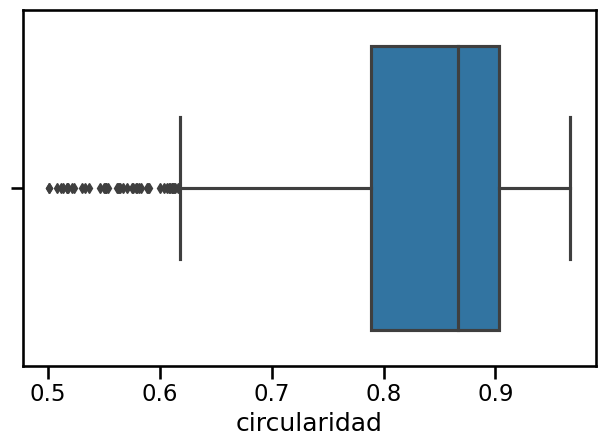

count    1018.000000
mean        0.830163
std         0.097560
min         0.500300
25%         0.788775
50%         0.867000
75%         0.902950
max         0.966700
Name: circularidad, dtype: float64


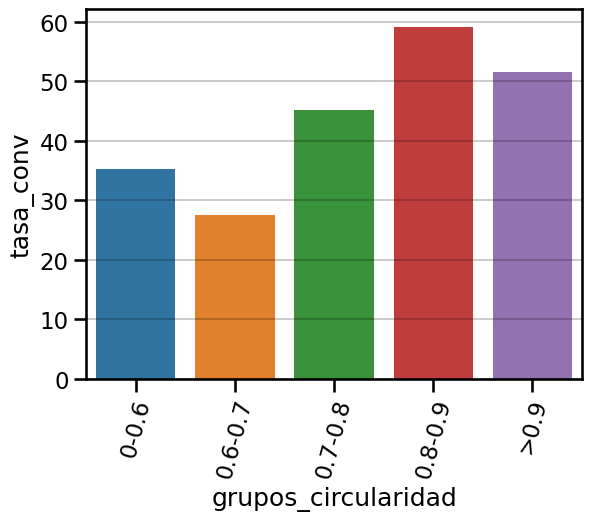

Porcentaje de cada grupo:
0.8-0.9    46.168959
>0.9       26.719057
0.7-0.8    14.145383
0.6-0.7     9.626719
0-0.6       3.339882
Name: grupos_circularidad, dtype: float64


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=data['circularidad'])
plt.xlabel('circularidad')
plt.tight_layout()
# plt.xlim(0,300)
plt.show()

print(data['circularidad'].describe())

# Nueva columna en el dataset: "grupos_circularidad"

data.loc[(data['circularidad']>=0) & (data['circularidad']<0.6),'grupos_circularidad'] = "0-0.6"
data.loc[(data['circularidad']>=0.6) & (data['circularidad']<0.7),'grupos_circularidad'] = "0.6-0.7"
data.loc[(data['circularidad']>=0.7) & (data['circularidad']<0.8),'grupos_circularidad'] = "0.7-0.8"
data.loc[(data['circularidad']>=0.8) & (data['circularidad']<0.9),'grupos_circularidad'] = "0.8-0.9"
data.loc[data['circularidad']>=0.9,'grupos_circularidad'] = ">0.9"


# Y grafiquemos la tasa de conversión para esta nueva columna
#graficar_tasas_conversion('grupos_circularidad','y_bin',type='bar')
orden = ["0-0.6", "0.6-0.7", "0.7-0.8", "0.8-0.9", ">0.9" ]
graficar_tasas_conversion('grupos_circularidad','y_bin',type='bar', order=orden)

# Rotar las etiquetas del eje x en 45 grados
plt.xticks(rotation=75)
plt.show()

# Calcular la frecuencia de cada grupo
grupo_frecuencia = data['grupos_circularidad'].value_counts()

# Calcular el porcentaje de cada grupo
grupo_porcentaje = grupo_frecuencia / len(data) * 100

# Imprimir los resultados
print("Porcentaje de cada grupo:")
print(grupo_porcentaje)

Como se observaba en el boxplot de `circularidad` los datos estan distribuidos hacia la derecha tomando valores altos > 0.8.

Se observa difencias en los valores de tasa de convergencia para todos los subgrupos, por tanto, `circularidad`, puede ser una variable predictiva.

## feret

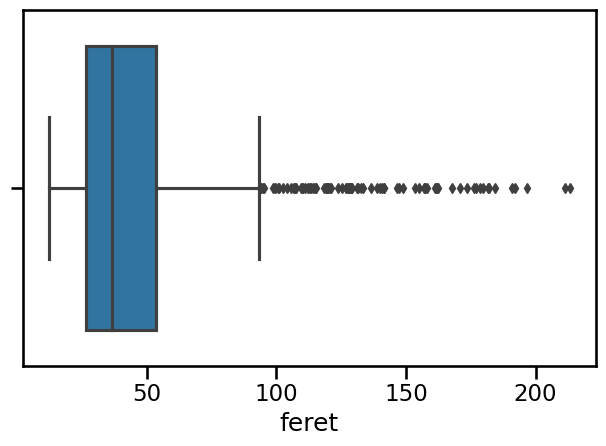

count    1018.000000
mean       47.328600
std        32.787878
min        12.247100
25%        26.633600
50%        36.527200
75%        53.490825
max       213.226500
Name: feret, dtype: float64


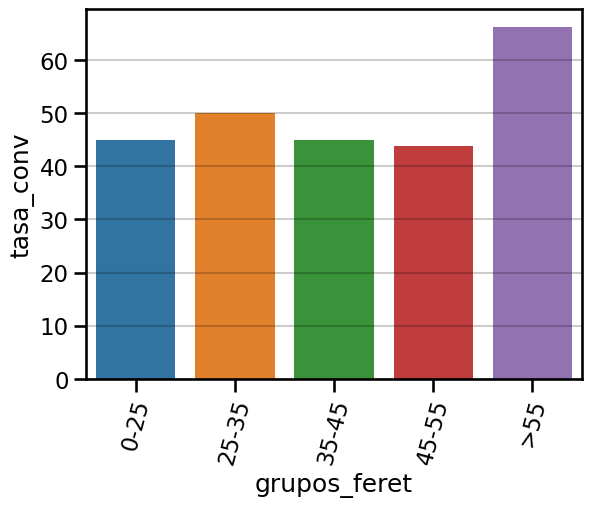

Porcentaje de cada grupo:
25-35    26.719057
>55      23.870334
0-25     20.137525
35-45    19.646365
45-55     9.626719
Name: grupos_feret, dtype: float64


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=data['feret'])
plt.xlabel('feret')
plt.tight_layout()
# plt.xlim(0,300)
plt.show()

print(data['feret'].describe())

# Nueva columna en el dataset: "grupos_feret"

data.loc[(data['feret']>=0) & (data['feret']<25),'grupos_feret'] = "0-25"
data.loc[(data['feret']>=25) & (data['feret']<35),'grupos_feret'] = "25-35"
data.loc[(data['feret']>=35) & (data['feret']<45),'grupos_feret'] = "35-45"
data.loc[(data['feret']>=45) & (data['feret']<55),'grupos_feret'] = "45-55"
data.loc[data['feret']>=55,'grupos_feret'] = ">55"

# Y grafiquemos la tasa de conversión para esta nueva columna
#graficar_tasas_conversion('grupos_feret','y_bin',type='bar')
orden = ["0-25", "25-35", "35-45", "45-55", ">55" ]
graficar_tasas_conversion('grupos_feret','y_bin',type='bar', order=orden)

# Rotar las etiquetas del eje x en 45 grados
plt.xticks(rotation=75)
plt.show()

# Calcular la frecuencia de cada grupo
grupo_frecuencia = data['grupos_feret'].value_counts()

# Calcular el porcentaje de cada grupo
grupo_porcentaje = grupo_frecuencia / len(data) * 100

# Imprimir los resultados
print("Porcentaje de cada grupo:")
print(grupo_porcentaje)


La variable `feret` no parece ser una variable predictora ya que la tasa de convergencia entre los subgrupos no cambion mucho entre sí.

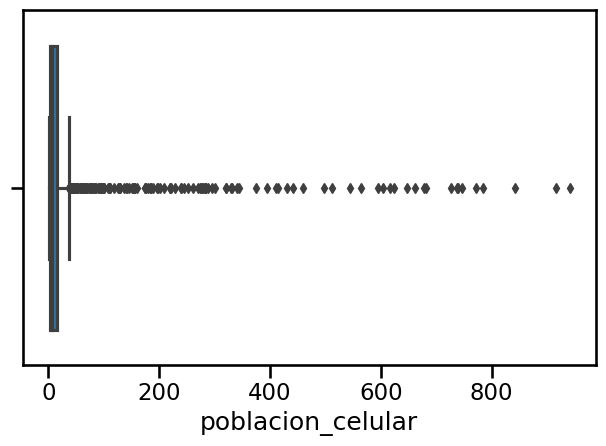

count    1018.000000
mean       40.202463
std       113.927112
min         0.250218
25%         2.567602
50%         5.712732
75%        16.219830
max       941.408471
Name: poblacion_celular, dtype: float64


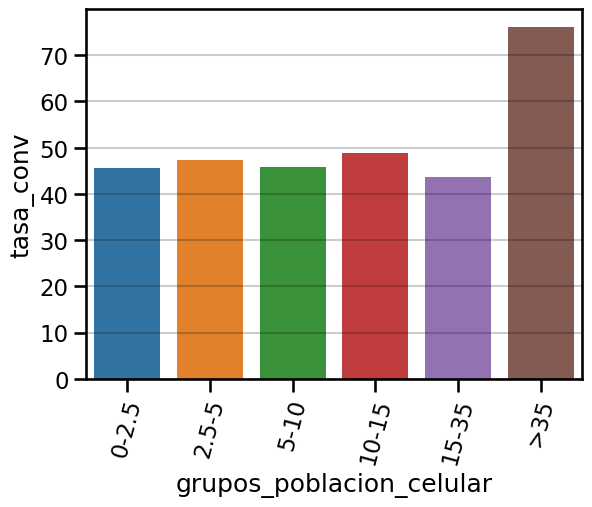

Porcentaje de cada grupo:
0-2.5    24.165029
2.5-5    22.593320
5-10     19.056974
>35      16.895874
15-35     9.233792
10-15     8.055010
Name: grupos_poblacion_celular, dtype: float64


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=data['poblacion_celular'])
plt.xlabel('poblacion_celular')
plt.tight_layout()
# plt.xlim(0,100)
plt.show()

print(data['poblacion_celular'].describe())

# Nueva columna en el dataset: "grupos_poblacion_celular"

data.loc[(data['poblacion_celular']>=0) & (data['poblacion_celular']<2.5),'grupos_poblacion_celular'] = "0-2.5"
data.loc[(data['poblacion_celular']>=2.5) & (data['poblacion_celular']<5),'grupos_poblacion_celular'] = "2.5-5"
data.loc[(data['poblacion_celular']>=5) & (data['poblacion_celular']<10),'grupos_poblacion_celular'] = "5-10"
data.loc[(data['poblacion_celular']>=10) & (data['poblacion_celular']<15),'grupos_poblacion_celular'] = "10-15"
data.loc[(data['poblacion_celular']>=15) & (data['poblacion_celular']<35),'grupos_poblacion_celular'] = "15-35"
data.loc[data['poblacion_celular']>=35,'grupos_poblacion_celular'] = ">35"

# Y grafiquemos la tasa de conversión para esta nueva columna
#graficar_tasas_conversion('grupos_poblacion_celular','y_bin',type='bar')
orden = ["0-2.5", "2.5-5", "5-10", "10-15", "15-35", ">35" ]
graficar_tasas_conversion('grupos_poblacion_celular','y_bin',type='bar', order=orden)

# Rotar las etiquetas del eje x en 45 grados
plt.xticks(rotation=75)
plt.show()

# Calcular la frecuencia de cada grupo
grupo_frecuencia = data['grupos_poblacion_celular'].value_counts()

# Calcular el porcentaje de cada grupo
grupo_porcentaje = grupo_frecuencia / len(data) * 100

# Imprimir los resultados
print("Porcentaje de cada grupo:")
print(grupo_porcentaje)


Cerca de 15 en `población_celular` corresponder a outlier, eso podría ser significativo, a la vez se observa que eso otliers >35 influyen en la variable respuesta con tasa de convergencia del 70%, mientras que los otros grupos estan entre el valor mínimo 0.25 y 5 esta homogéneamente distribuidos y su tasa de convergencia es muy similar.

Tendríamos que ver con detalle cómó tratar los outliers porque estos son los únicos que parecen tener peso en la predicción de la variable esferoide.

# Análisis bivariado

[link ayuda](https://towardsdatascience.com/an-introduction-to-exploratory-data-analysis-in-python-9a76f04628b8)

[link2](https://cmdlinetips.com/2019/03/how-to-make-grouped-boxplots-in-python-with-seaborn/)

In [ ]:
data.columns

Index(['nombre_id', 'area', 'perimetro', 'ancho', 'altura', 'circularidad',
       'feret', 'FeretAngle', 'min_feret', 'razon_aspecto', 'redondez',
       'Solidity', 'esferoide', 'dia', 'diametro', 'poblacion_celular',
       'y_bin', 'grupos_area', 'grupos_perimetro', 'grupos_circularidad',
       'grupos_feret', 'grupos_poblacion_celular'],
      dtype='object')

## dia

Podría resultar interesante estudiar la variable ordinal `dia` que tiene pocos valores Vs las otras variables etiquetando con la variable respuesta `esferoide` cada valor de dia, es decir, como "si" y "no".

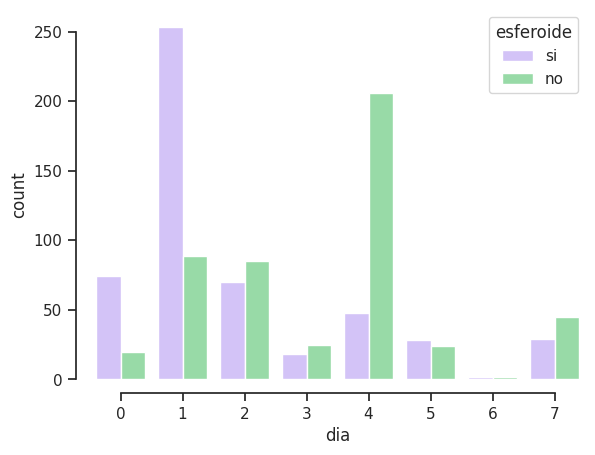

In [ ]:
sns.set_theme(style="ticks", palette="pastel")
datos_por_dia = data['dia'].value_counts().reindex(range(1, 9), fill_value=0).sort_index()
sns.countplot(x='dia', hue='esferoide', data=data, palette=["m", "g"])
sns.despine(offset=10, trim=True)
plt.show()

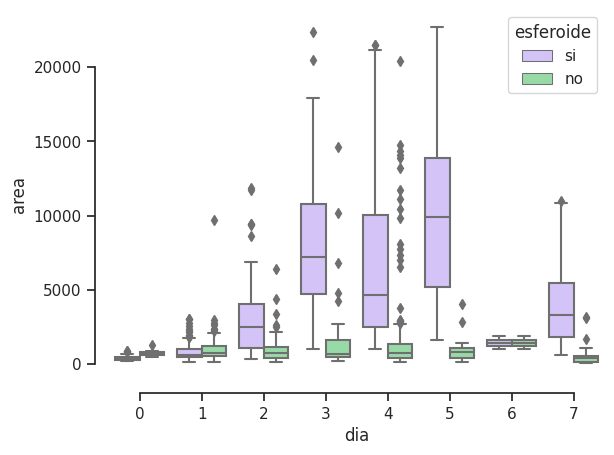

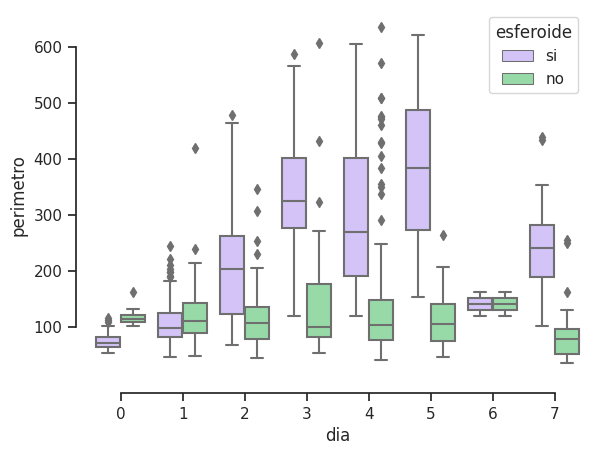

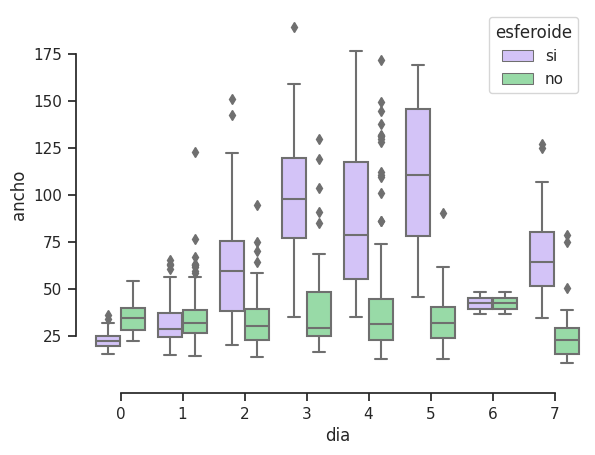

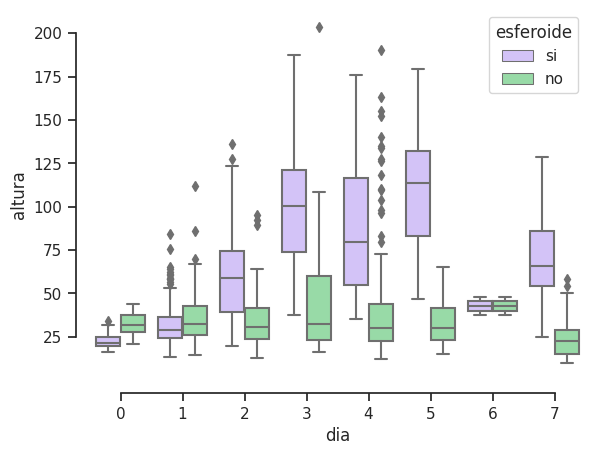

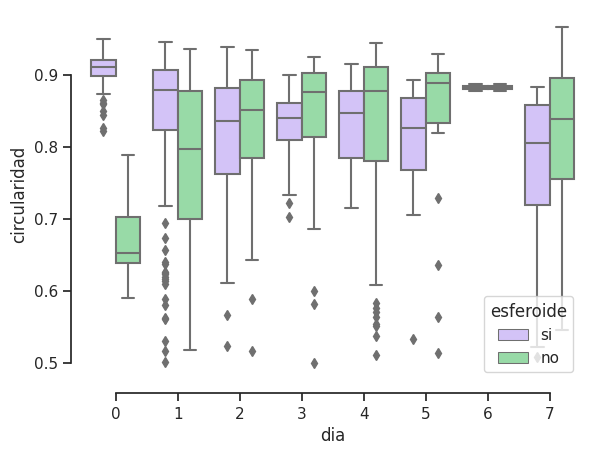

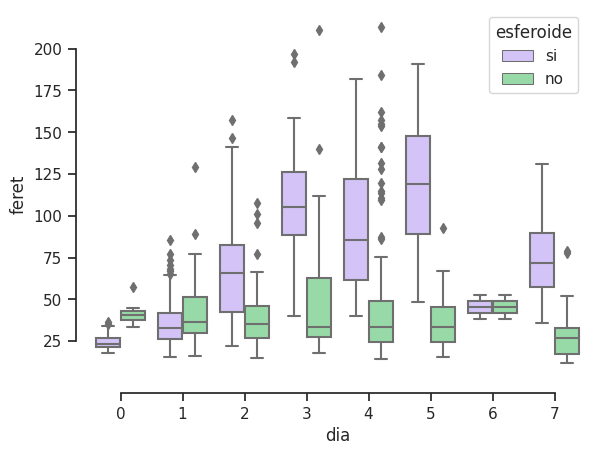

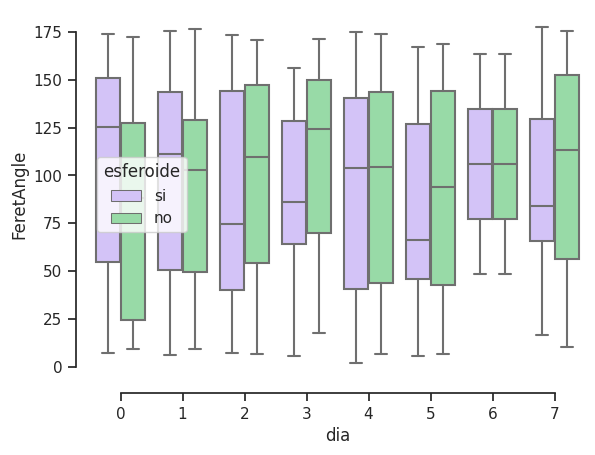

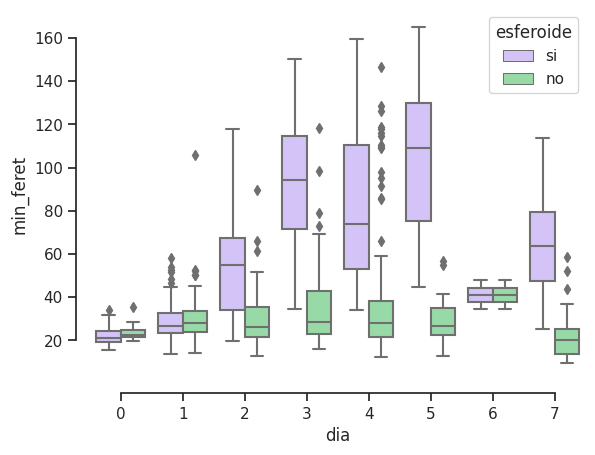

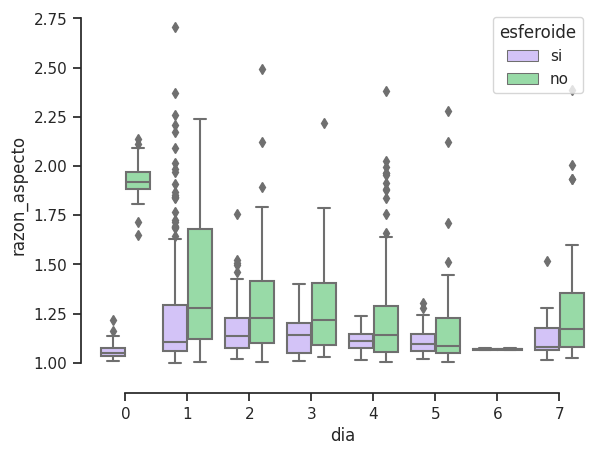

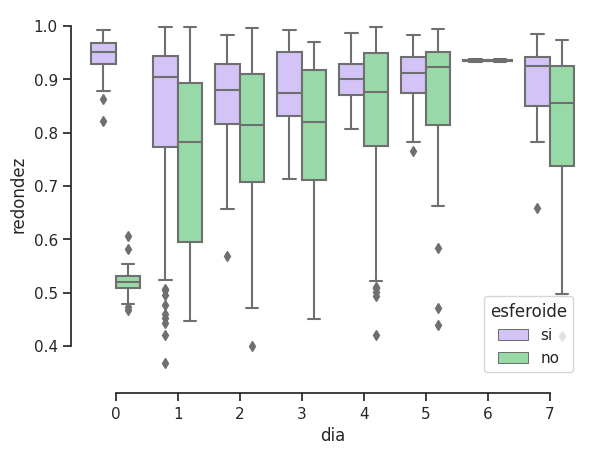

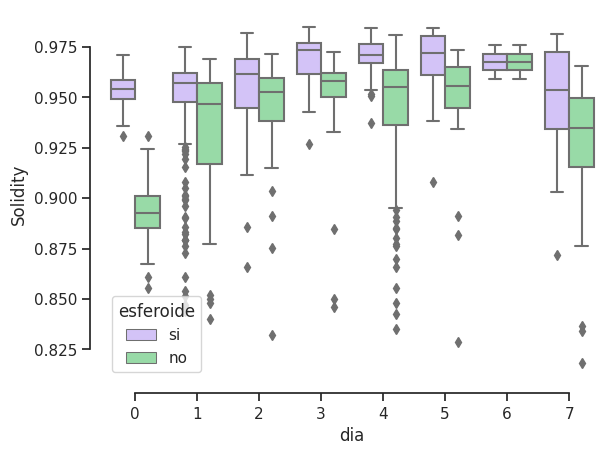

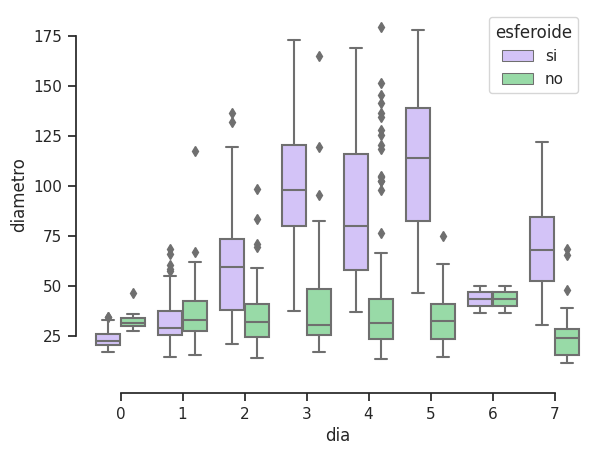

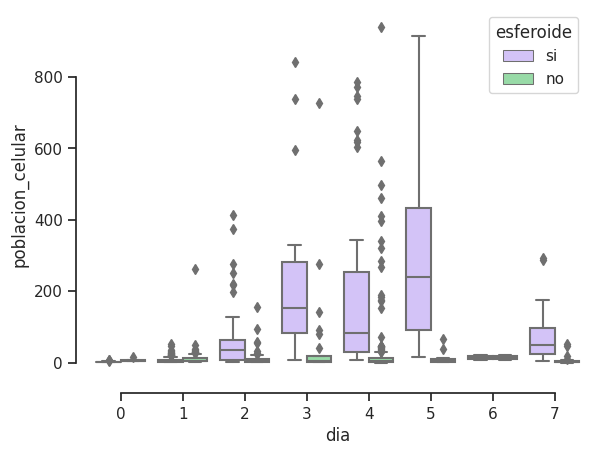

In [ ]:
sns.set_theme(style="ticks", palette="pastel")
columns = ['area', 'perimetro', 'ancho', 'altura', 'circularidad',
           'feret', 'FeretAngle', 'min_feret', 'razon_aspecto', 'redondez',
           'Solidity', 'diametro', 'poblacion_celular'
           ]

for i, col in enumerate(columns):
    sns.boxplot(y=col, x="dia", hue='esferoide', data=data, palette=["m", "g"])
    sns.despine(offset=10, trim=True)
    plt.show()

# Link de Infografía

(editable) : [Enlace de canva](https://https://www.canva.com/design/DAFmgEfgoV8/psn_dYfNIox8INMlko3HkA/edit?analyticsCorrelationId=dd9f3d8e-5124-4f8f-9656-fdddd641519e)


[Archivo PDF](https://drive.google.com/file/d/1xoAhdTrWqo_7wlvZO5lBuGdoQdqDTYFi/view?usp=sharing)
